<a href="https://colab.research.google.com/github/BarbaraAngelesOrtiz/Challenge3-Alura-Store/blob/main/TelecomX_LATAM2_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X - Develop predictive models for customer churn

🎯 Mission: Develop predictive models capable of predicting which customers are most likely to cancel their services.

The company wants to anticipate the churn problem, and the goal is to build a robust pipeline for this initial modeling stage.

🧠 Challenge Objectives

* Prepare data for modeling (processing, coding, normalization).

* Perform correlation analysis and variable selection.

* Train two or more classification models.

* Evaluate model performance with metrics.

* Interpret results, including variable importance.

* Create a strategic conclusion highlighting the main factors influencing churn.

🧰 What will be done:

1. Data preprocessing for machine learning
2. Building and evaluating predictive models
3. Interpreting results and delivering insights
4. Technical communication with a strategic focus


## 📂Extracting the Previously Processed File in TelecomX LATAM

The CSV file containing the previously processed data is uploaded. This file, which was cleaned and organized in Part 1 of the Telecom X challenge, contains only the relevant columns, already with the data corrected and standardized.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

# RAW URL of the JSON
url = "https://raw.githubusercontent.com/BarbaraAngelesOrtiz/Challenge3-Alura-Store/refs/heads/main/dataset.csv"

# Directly load JSON from the URL into a DataFrame
df = pd.read_csv(url)

## 🔍 **EDA (Early Exploratory Analysis)**

* View general information

* Descriptive statistics for numerical variables

* Review of categorical variables (frequencies)

* Review of nulls

* Histograms and boxplots for numerical variables

* Bar charts for categorical variables

In [15]:
# General information
print("\nGeneral information:")
print(df.info())


General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customerID                         7043 non-null   object 
 1   Churn                              7043 non-null   int64  
 2   customer_gender                    7043 non-null   int64  
 3   customer_SeniorCitizen             7043 non-null   int64  
 4   customer_Partner                   7043 non-null   int64  
 5   customer_Dependents                7043 non-null   int64  
 6   customer_tenure                    7043 non-null   int64  
 7   phone_PhoneService                 7043 non-null   int64  
 8   phone_MultipleLines                7043 non-null   int64  
 9   internet_OnlineSecurity            7043 non-null   int64  
 10  internet_OnlineBackup              7043 non-null   int64  
 11  internet_DeviceProtection         

In [16]:
# Check for null values
print("\nNull values per column:")
print(df.isnull().sum())

# Separate numeric and categorical columns
numericas = df.select_dtypes(include=['int64', 'float64']).columns
categoricas = df.select_dtypes(include=['object', 'category']).columns

# Descriptive statistics - numerical
print("\nDescriptive Statistics - Numerical Variables:")
print(df[numericas].describe())

# Frequency of values - categorical
print("\nFrequency of values - Categorical variables:")
for col in categoricas:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Null values per column:
customerID                           0
Churn                                0
customer_gender                      0
customer_SeniorCitizen               0
customer_Partner                     0
customer_Dependents                  0
customer_tenure                      0
phone_PhoneService                   0
phone_MultipleLines                  0
internet_OnlineSecurity              0
internet_OnlineBackup                0
internet_DeviceProtection            0
internet_TechSupport                 0
internet_StreamingTV                 0
internet_StreamingMovies             0
account_PaperlessBilling             0
MonthlyCharges                       0
TotalCharges                         0
Internet_DSL                         0
Internet_Fiber optic                 0
Internet_No                          0
Contract_Month-to-month              0
Contract_One year                    0
Contract_Two year                    0
Payment_Bank transfer (automatic)    0


**Observations from the first EDA analysis**

🔍 1. **Null Data**

There are no null values in any column, thus avoiding the need to impute or delete data. The dataset is complete and null-free.

🔍 2. **Categorical Variables**

customerID has unique values for each row (7,043 distinct ones). Therefore, it does not directly provide predictive value (it is only an identifier).

🔍 3. **Target Variable: Churn**

* Churn has a mean of ~0.265, indicating that ~26.5% of customers churned.

🔍 4. **Binary Variables (0/1)**

Many variables are coded as 0 and 1, which is very useful.

For example:

* customer_gender: balanced (~50/50).

* customer_SeniorCitizen: Only ~16% are older adults → this could be an interesting minority to target.

* phone_PhoneService: ~90% have phone service.

* internet_OnlineSecurity, internet_OnlineBackup, internet_TechSupport: All have a low proportion of users (~28%-34%). They could be correlated with retention or cancellation.

* Payment methods are also well coded: for example, the most common method appears to be electronic check (33.6%).

🔍 5. **Continuous Variables**

1. customer_tenure:

* Range: 0 to 72 months.

* Median: ~29 months → many people have already been customers for more than 2 years.

* Values of 0 indicate new customers.

2. MonthlyCharges and TotalCharges:

* MonthlyCharges has a more even distribution.

* TotalCharges varies widely; it may be strongly correlated with tenure.
------


### **Churn Distribution**

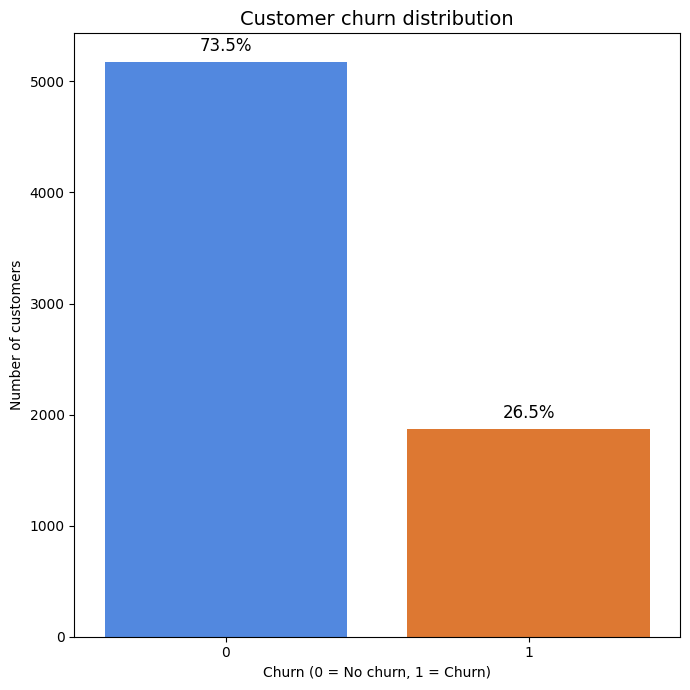

In [17]:
# We define the colors in a dictionary to use throughout the analysis
churn_palette = {
    0: '#3B82F6',  # Blue (not abandonment)
    1: '#F97316'   # Orange (abandonment)
}

# Count and percentage
churn_counts = df['Churn'].value_counts().sort_index()
churn_percent = churn_counts / churn_counts.sum() * 100

# Chart
plt.figure(figsize=(7, 7))
bars = sns.barplot(
    x=churn_counts.index,
    y=churn_counts.values,
    palette=[churn_palette[i] for i in churn_counts.index]
)

plt.title('Customer churn distribution', fontsize=14)
plt.xlabel('Churn (0 = No churn, 1 = Churn)')
plt.ylabel('Number of customers')

# Write percentages above the bars
for i, val in enumerate(churn_counts.values):
    plt.text(i, val + 100, f"{churn_percent[i]:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

**Observations**

It is confirmed that with Churn having a mean of ~0.265, meaning that ~26.5% of customers churned, it is an unbalanced dataset, with more customers not canceling (73.5%).

This can be important for classification models: it may require balancing techniques (such as SMOTE, undersampling, class weights, etc.).

---

### **Histogram of Non-binary Numeric Variables**

The non-binary numeric variables (0 or 1) in your dataset are:

* customer_tenure

* MonthlyCharges

* TotalCharges

📌 Doane's formula is applied to determine an adjusted number of bins, taking into account the skewness of the data. A density line (Kernel Density Estimate, KDE) is added above the histogram to better visualize the shape of the distribution.

The quick interpretation of skewness is:

🔹Skew = 0 → symmetric distribution (like a bell).

🔹Skew > 0 → right tail (positive extreme values).

🔹Skew < 0 → left tail (negative extreme values).



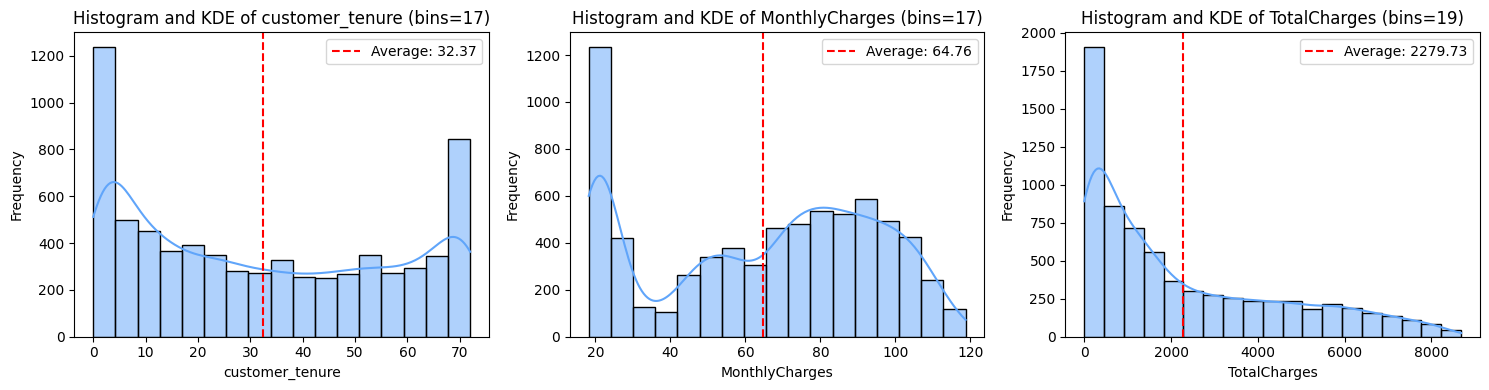



Skewness of continuous variables:

- customer_tenure: 0.24 → symmetrical to the right
- MonthlyCharges: -0.22 → symmetrical to the left
- TotalCharges: 0.96 → slightly skewed to the right


In [18]:
from scipy.stats import skew

# Function to calculate the number of bins according to Doane
def calcular_bins_doane(serie):
    n = len(serie)
    g1 = skew(serie, bias=False)
    sigma_g1 = np.sqrt(6 * (n - 2) / ((n + 1) * (n + 3)))
    k = 1 + np.log2(n) + np.log2(1 + abs(g1) / sigma_g1)
    return int(round(k))

variables_continuas = ['customer_tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 4))

for i, col in enumerate(variables_continuas):
    plt.subplot(1, 3, i + 1)
    serie = df[col].dropna()
    bins = calcular_bins_doane(serie)

    sns.histplot(serie, bins=bins, color="#60A5FA", edgecolor='black', kde=True)

    mean_val = serie.mean()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Average: {mean_val:.2f}')

    plt.title(f'Histogram and KDE of {col} (bins={bins})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


variables_continuas = ['customer_tenure', 'MonthlyCharges', 'TotalCharges']

print("\n\nSkewness of continuous variables:\n")
for var in variables_continuas:
    valor_skew = skew(df[var], bias=False)
    forma = (
        "symmetrical" if abs(valor_skew) < 0.5 else
        "slightly skewed" if abs(valor_skew) < 1 else
        "very biased"
    )
    direccion = "to the right" if valor_skew > 0 else "to the left" if valor_skew < 0 else ""
    print(f"- {var}: {valor_skew:.2f} → {forma} {direccion}")


**Observations**

1. customer_tenure (skew = 0.24 → symmetrical to the right)

It is almost symmetrical, but with a slight tilt to the right. This indicates that most customers have a tenure close to the median, but there are some customers with higher tenures (tails toward high values). This is not a very strong skew, so it could be treated as near-normal for simple analyses.

2. MonthlyCharges (skew = -0.22 → symmetrical to the left)

Also quite close to symmetrical, but with a slight tilt to the left. This indicates that most pay medium or high amounts, but there is a small group with low monthly charges (tails toward low values). It may reflect different plans or packages with lower prices for some customers.

3. TotalCharges (skew = 0.96 → slightly skewed to the right)

Here, there is a more noticeable asymmetry to the right. This means there is a relatively long tail of customers with very high total charges. This is logical because TotalCharges is related to the length of the contract (tenure) and the monthly charge.

This variable can have extreme values (old customers with many accumulated bills). It might be useful to consider (logarithmic) transformations if used in bias-sensitive models.

---

### **Boxplots by variable, segmented by Churn**

Sample median, quartiles, and possible outliers by Churn group, thus comparing trends and dispersion.

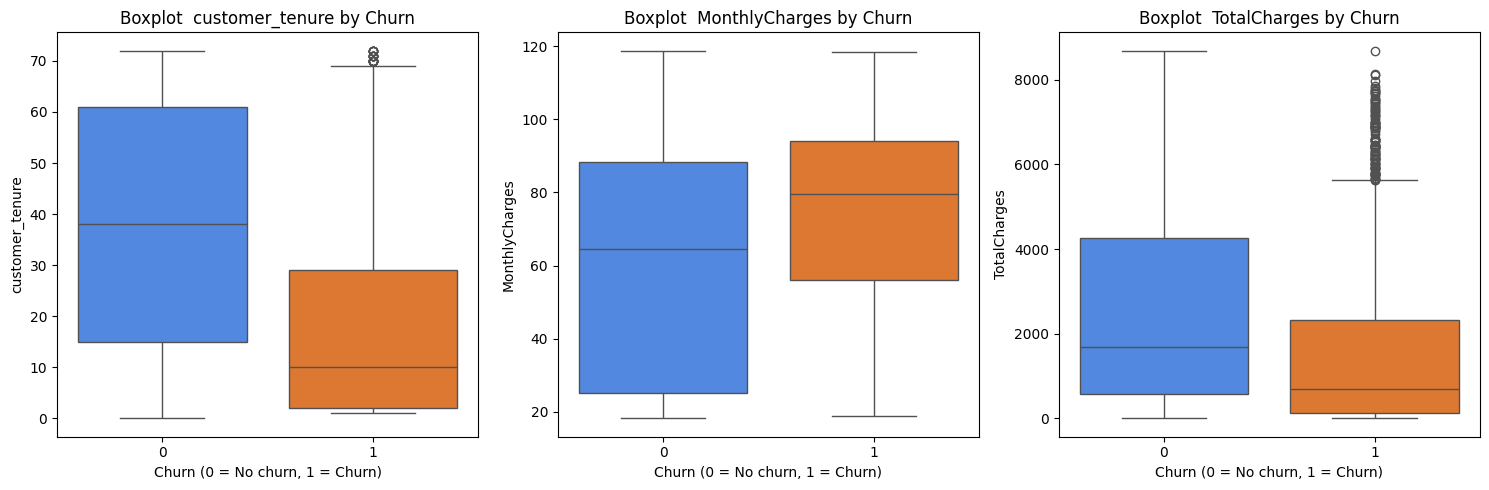

In [19]:
variables_continuas = ['customer_tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))

for i, col in enumerate(variables_continuas):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=df, palette={'0': '#3B82F6', '1': '#F97316'})
    plt.title(f'Boxplot  {col} by Churn')
    plt.xlabel('Churn (0 = No churn, 1 = Churn)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Observations**

🔸customer_tenure (customer tenure):

* Customers who did not churn (Churn=0) have a much higher median customer tenure than those who churned.

* Churners (Churn=1) tend to be new customers (median ~10), while those who remain are older (median ~38).

* This suggests that churn occurs more frequently in the first few months of service.

🔸MonthlyCharges (monthly charges):

* Churners have higher monthly charges, in general.

* The median monthly charges are higher for churning customers.

* Customers with more expensive services may be less satisfied or see less value for the price.

🔸TotalCharges (cumulative charges):

* Customers who don't churn have a much higher TotalCharges, which is expected since they've been with us longer.

* Those who churn have a low cumulative total, in line with their short time as customers.

-----

### **FacetGrid with histograms and KDE for each variable by Churn**

Shows the full shape of the distribution for customers who churned and those who didn't, with overlapping for better comparison.

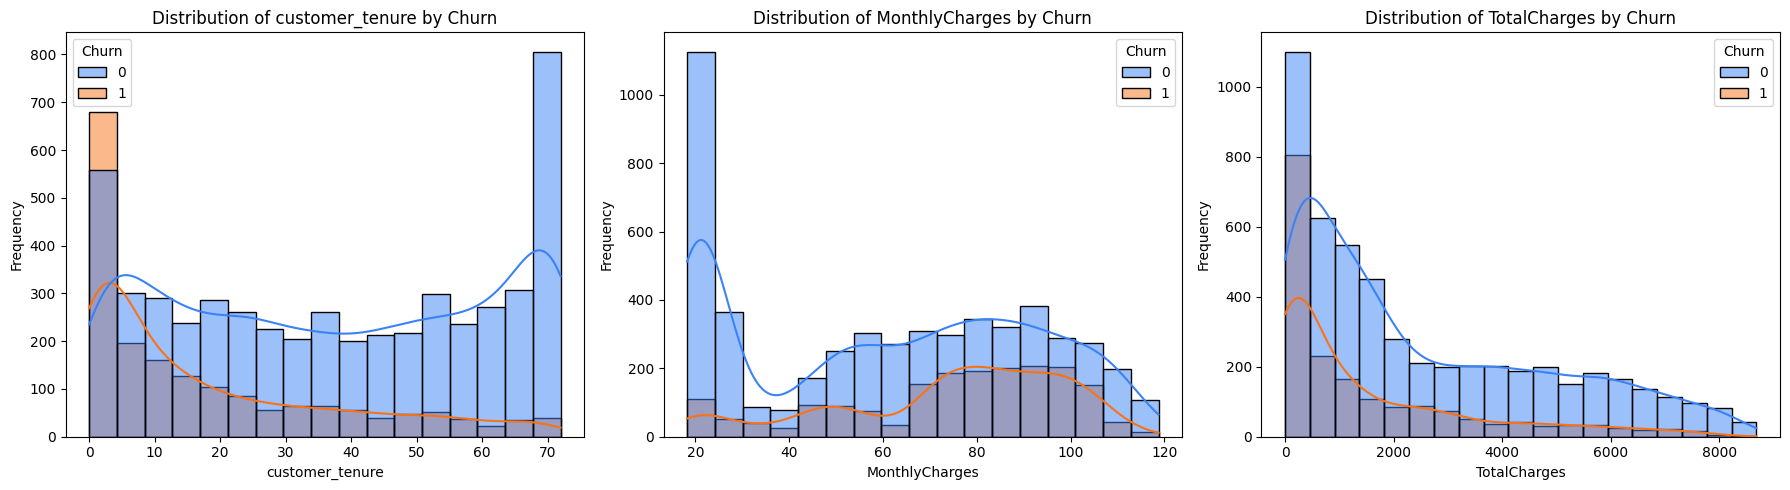

In [20]:
variables_continuas = ['customer_tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18, 5))

for i, col in enumerate(variables_continuas):
    plt.subplot(1, 3, i + 1)
    bins = calcular_bins_doane(df[col].dropna())
    sns.histplot(
        data=df,
        x=col,
        hue='Churn',
        bins=bins,
        kde=True,
        palette=churn_palette,
        alpha=0.5,
        edgecolor='black'
    )
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Observations**

🔸customer_tenure:

* A large number of customers who churn do so in the first few months (0-10 months).

* The distribution of non-churners is more dispersed, with increasing peaks with longer tenure.

🔸MonthlyCharges:

* Customers who churn tend to be more concentrated in the 70-100 monthly charge range, while those who do not churn are more evenly distributed.

* Many non-churners have low charges (~20-30), which could be associated with more stable entry-level plans.

🔸TotalCharges:

* Most churners have very low total charges (<2,000), confirming that they are leaving early in their customer lifecycle.

* Those who do not churn have a broader and more widespread distribution up to >8,000.

----

### **Bar charts of binary categorical variables vs. Churn**

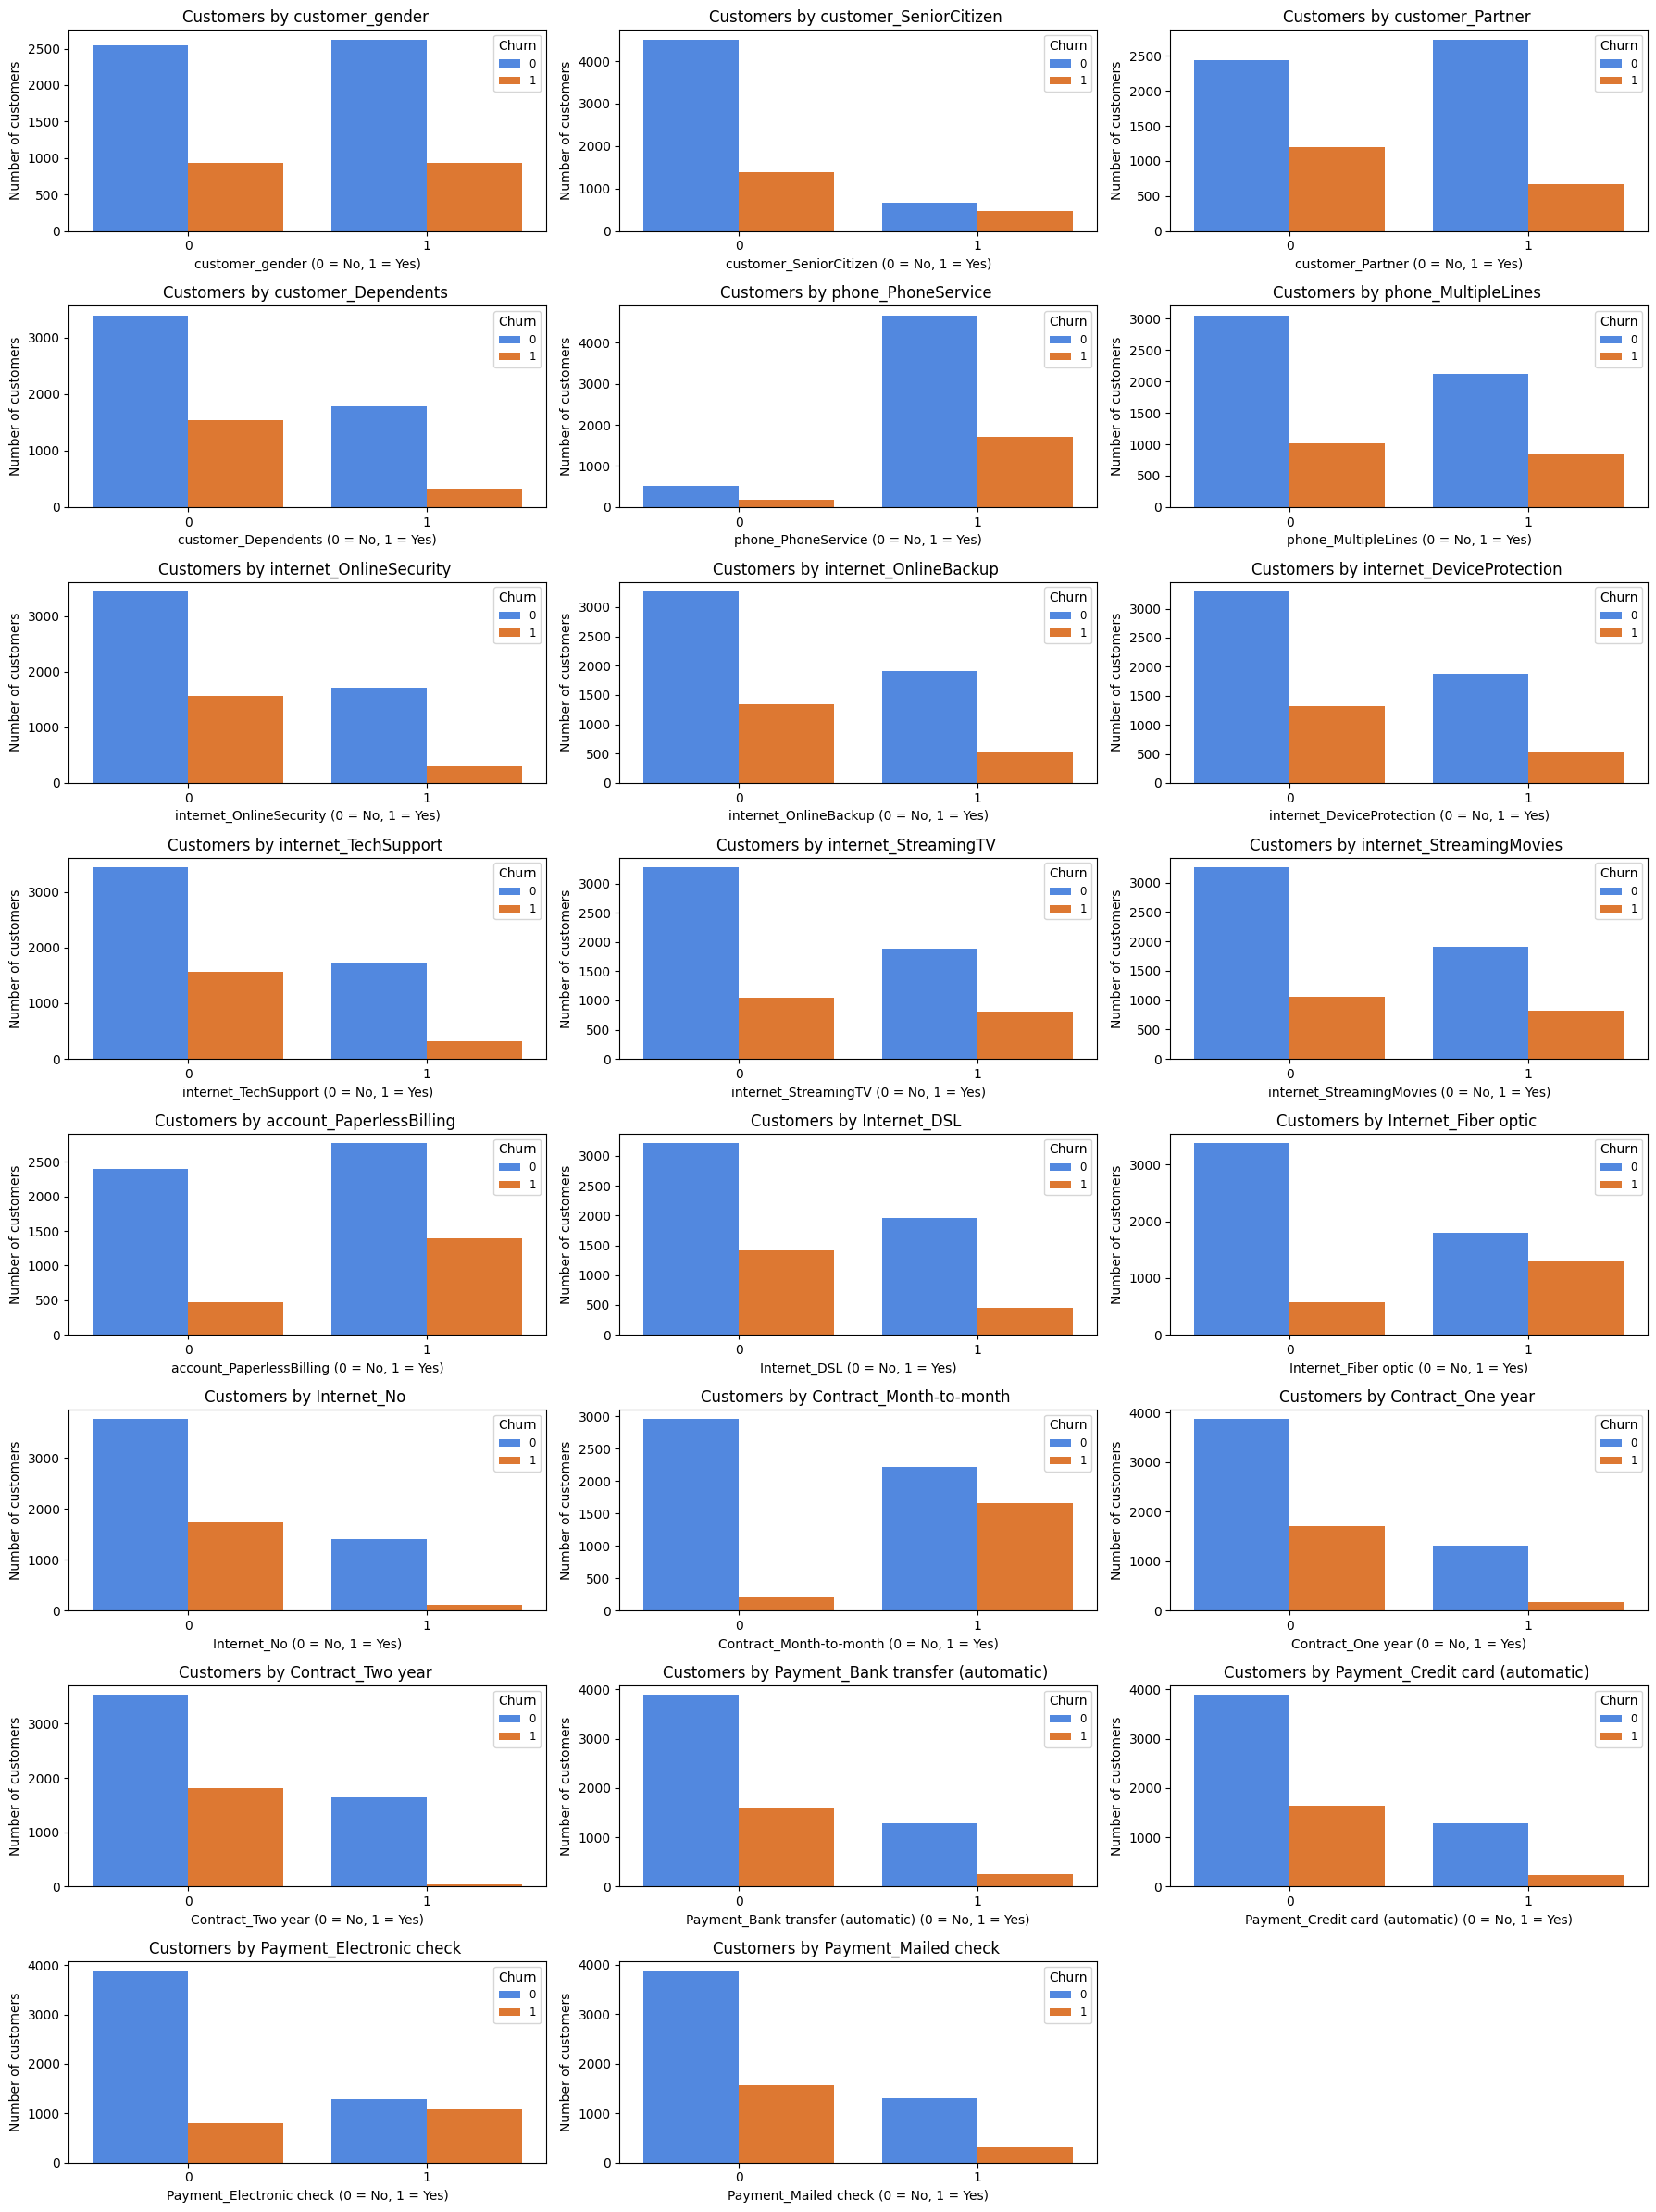

In [21]:
categoricas_binarias = [
    'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling',
    'Internet_DSL', 'Internet_Fiber optic', 'Internet_No',
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
    'Payment_Bank transfer (automatic)', 'Payment_Credit card (automatic)',
    'Payment_Electronic check', 'Payment_Mailed check'
]

plt.figure(figsize=(18, 24))

for i, col in enumerate(categoricas_binarias):
    ax = plt.subplot(8, 3, i + 1)

   # We group by the variable y churn and count the amount
    counts = df.groupby([col, 'Churn']).size().reset_index(name='count')

   # Barplot clustered with hue by Churn
    sns.barplot(data=counts, x=col, y='count', hue='Churn', palette=churn_palette, ax=ax)

    ax.set_title(f'Customers by {col} ')
    ax.set_xlabel(f'{col} (0 = No, 1 = Yes)')
    ax.set_ylabel('Number of customers')
    ax.legend(title='Churn', fontsize='small', loc='upper right')

plt.tight_layout()
plt.show()


**Observations**

📊 1. **Customer Personal Characteristics
Gender (customer_gender)**:

There are no visible differences between men and women in terms of churn.

* Senior Citizen (customer_SeniorCitizen): Senior citizens (1) have a higher churn rate than non-senior citizens (0).

* Partner (customer_Partner): Customers with partners (1) have a lower churn rate than those without (0).

* Dependents (customer_Dependents): Customers with dependents (1) also have a lower churn rate.

☎️ 2. **Phone Service
Phone Service (phone_PhoneService)**:

* Almost all customers have phone service, and churn is distributed within that group.

* Multiple Lines (phone_MultipleLines): Customers with multiple lines appear to churn slightly more than those without.

🌐 3. **Internet Services
Online Security, Backup, Device Protection, Tech Support:**

* In all of these cases, customers without these services (0) churn more than those with them (1). This suggests that these services have a protective effect against churn.

* Streaming TV and Streaming Movies: Those who use these services (1) appear to have slightly higher churn, or at least there is no clear protective effect.

💳 4. **Billing and Contract
Paperless Billing:**

* Higher churn among those with electronic invoicing (1).

* Contract type: Month-to-month: Much higher churn.

* One year / Two year: Lower churn rate. Longer contracts retain customers better.

🧑‍💻 5. **Internet Type
DSL vs. Fiber Optic vs. No Internet:**

* Fiber Optic users have a much higher churn rate.

* Those without internet almost never churn (probably because they are landline-only or very basic users).

💰 6. **Payment Method
Electronic Check:**

* Clearly the method with the highest churn rate.

* Bank transfer, Credit card (automatic), Mailed check: Lower churn compared to electronic check.

📌 **General Conclusions**

1. Churn Risk Factors:

* Single customers, without dependents, senior citizens.

* Monthly contract users and those paying by electronic check.

* Users without security, backup, or technical support services.

* Fiber optic customers with electronic billing.

2. Protective factors:

* Having an annual or biennial contract.

* Having value-added services (backup, tech support).

* Using automatic or traditional payment methods (less churn).

3. No gender discrimination:

* Gender does not appear to influence the churn rate.

----

# 🔧**Data Preparation**

## **Removing Irrelevant Columns**



In [22]:
df = df.drop(columns=['customerID'])

## **Data Visualization**

In [23]:
#Data visualization

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Churn                              7043 non-null   int64  
 1   customer_gender                    7043 non-null   int64  
 2   customer_SeniorCitizen             7043 non-null   int64  
 3   customer_Partner                   7043 non-null   int64  
 4   customer_Dependents                7043 non-null   int64  
 5   customer_tenure                    7043 non-null   int64  
 6   phone_PhoneService                 7043 non-null   int64  
 7   phone_MultipleLines                7043 non-null   int64  
 8   internet_OnlineSecurity            7043 non-null   int64  
 9   internet_OnlineBackup              7043 non-null   int64  
 10  internet_DeviceProtection          7043 non-null   int64  
 11  internet_TechSupport               7043 non-null   int64

## **Correlation Analysis**

* Detect redundant variables.

* Select the most relevant variables.

* Avoid problems such as overfitting or misinterpretation of models.

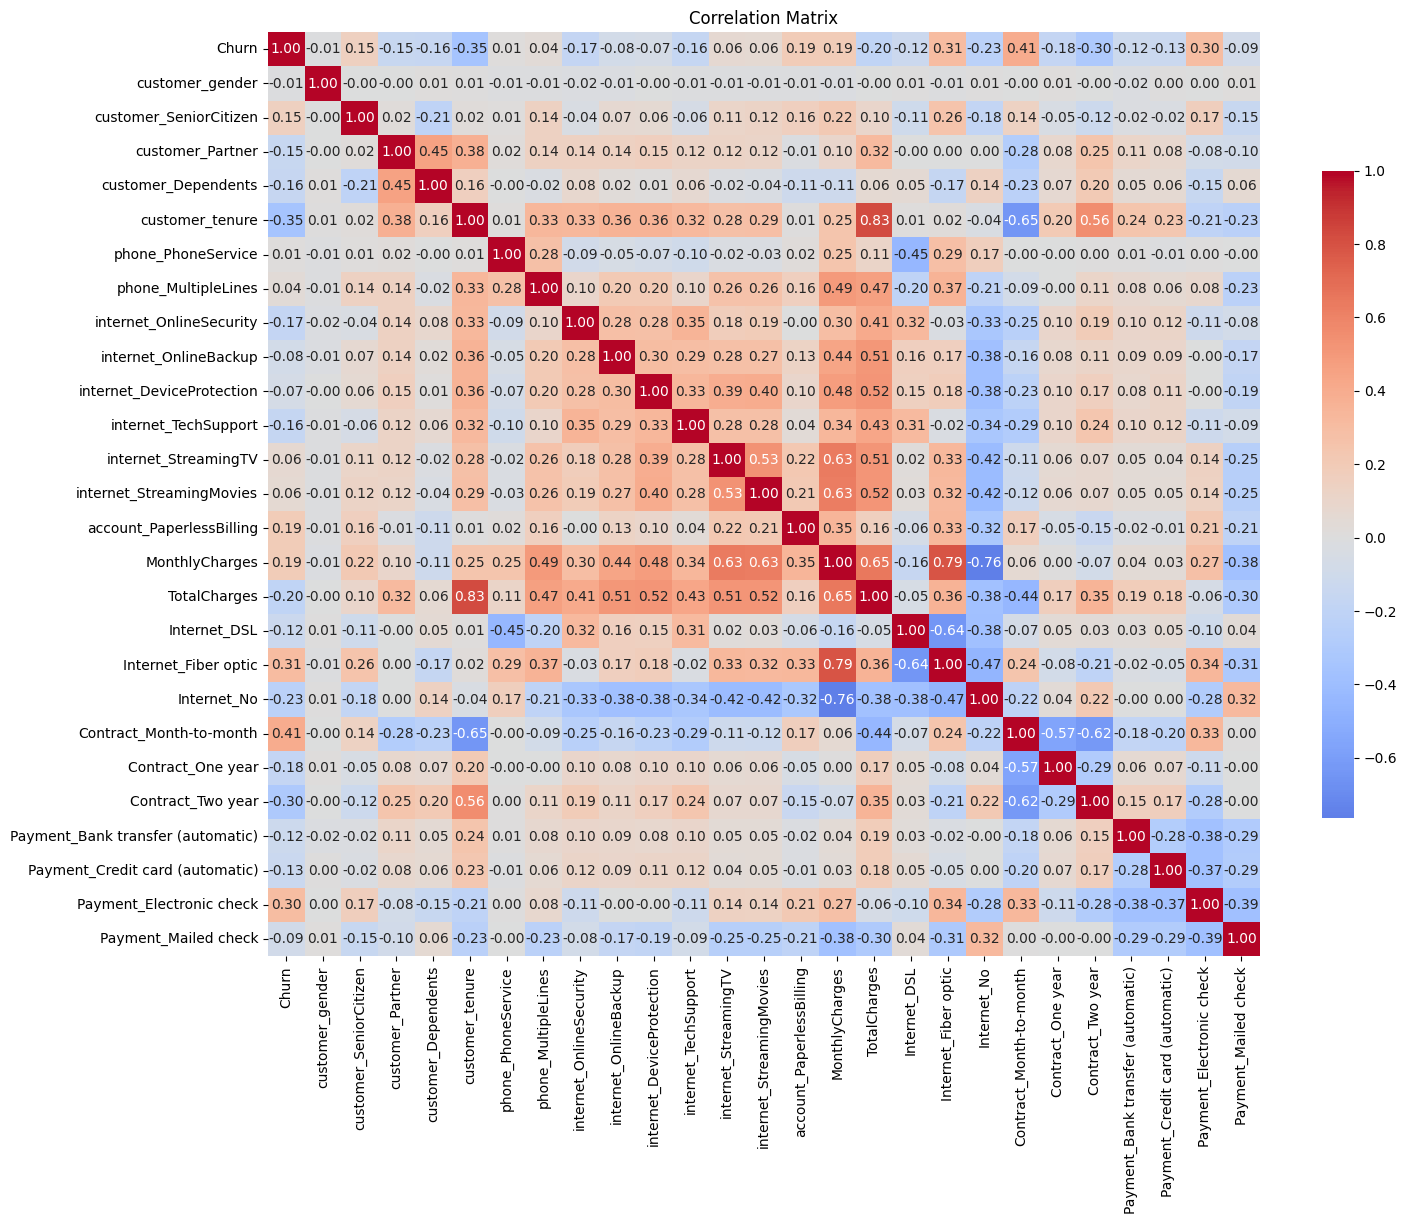

In [24]:
# We calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Chart size
plt.figure(figsize=(16, 12))

# Heat map
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, cbar_kws={'shrink': 0.7})
plt.title("Correlation Matrix")
plt.show()


In [25]:
# Correlation of all variables with the output variable Churn
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)
print(correlation_with_churn)


Churn                                1.000000
Contract_Month-to-month              0.405103
Internet_Fiber optic                 0.308020
Payment_Electronic check             0.301919
MonthlyCharges                       0.193356
account_PaperlessBilling             0.191825
customer_SeniorCitizen               0.150889
internet_StreamingTV                 0.063228
internet_StreamingMovies             0.061382
phone_MultipleLines                  0.040102
phone_PhoneService                   0.011942
customer_gender                     -0.008612
internet_DeviceProtection           -0.066160
internet_OnlineBackup               -0.082255
Payment_Mailed check                -0.091683
Payment_Bank transfer (automatic)   -0.117937
Internet_DSL                        -0.124214
Payment_Credit card (automatic)     -0.134302
customer_Partner                    -0.150448
customer_Dependents                 -0.164221
internet_TechSupport                -0.164674
internet_OnlineSecurity           

**Key Observations from the Churn Correlation Analysis**

The correlations are not extremely high (none exceed 0.5).

There are clear patterns:

* Contractual and service characteristics have a greater impact than personal characteristics.

* Variables such as tenure, contract type, and technical services are good predictors of retention.

* Higher positions and less seniority tend to indicate churn.

🔴 **Variables most positively correlated with churn (Churn = 1):**

These variables increase the likelihood of a customer churning:

| Variable | Correlation | Interpretation |
| -------------------------- | ----------- | --------------------------------------------------------------------------------- |
| `Contract_Month-to-month` | **+0.41** | Monthly contracts have a high churn rate. |
| `Internet_Fiber optic` | +0.31 | Fiber optic customers have higher churn, perhaps due to higher costs. |
| `Payment_Electronic check` | +0.30 | Higher churn among those who pay by electronic check. |
| `MonthlyCharges` | +0.19 | The higher the monthly billing, the higher the likelihood of churn. |
| `account_PaperlessBilling` | +0.19 | Slightly higher churn with paperless billing. |
| `customer_SeniorCitizen` | +0.15 | Slightly higher churn among older adults. |

**Variables Negatively Correlated with Churn:**

These variables are associated with customers who remain (Churn = 0):

| Variable | Correlation | Interpretation |
| ------------------------- | ----------- | ----------------------------------------------------------------------- |
| `customer_tenure` | **-0.35** | The longer the customer has been with us, the lower the likelihood of churn. |
| `Contract_Two year` | **-0.30** | Long-term contracts retain more customers. |
| `Internet_No` | -0.23 | Customers without internet service tend to churn less. |
| `TotalCharges` | -0.20 | Customers with high total charges tend to be more stable. |
| `Contract_One-year` | -0.18 | One-year contracts also retain more. |
| `internet_OnlineSecurity` | -0.17 | Online security services decrease the likelihood of churn. |
| `internet_TechSupport` | -0.16 | Technical support is associated with higher retention. |
| `customer_Dependents` | -0.16 | Customers with dependents churn less. |
| `customer_Partner` | -0.15 | Having a partner is associated with lower churn. |

-----

## **Normalization, Balancing, and Correlation Analysis**

X_train and X_test are the original unscaled and unbalanced data.

X_train_scaled and X_test_scaled are the scaled data.

X_train_resampled and y_train_resampled are the scaled and balanced data with SMOTE (for training only).

In [26]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Separate features and target

X = df.drop(columns='Churn')  # All columns except target
y = df['Churn']              # Target column

# 2. Split data into a Train-Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#3. Scaling using SOLO train to avoid data leakage
scaler = StandardScaler()
X_train_scaled_array = scaler.fit_transform(X_train)   # Adjust and transform train
X_test_scaled_array = scaler.transform(X_test)         # Transform test with the same scaler

# 4. Convert to DataFrame keeping original names and indexes
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=X_test.columns, index=X_test.index)

# 5. Apply SMOTE ONLY on the train
smote = SMOTE(random_state=42)
X_train_resampled_array, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 6. Convert to DataFrame after SMOTE
X_train_resampled = pd.DataFrame(X_train_resampled_array, columns=X_train.columns)

# 7. Ensure that test has the same columns as train
X_test_scaled = X_test_scaled.reindex(columns=X_train.columns, fill_value=0)

# 8. Check distribution
print("Original distribution in train:", Counter(y_train))
print("Distribution after SMOTE:", Counter(y_train_resampled))


Original distribution in train: Counter({0: 4139, 1: 1495})
Distribution after SMOTE: Counter({0: 4139, 1: 4139})


**Observations**

1. Significant Initial Imbalance

* Class 0 (customers who did not cancel): 4,139 cases.

* Class 1 (customers who canceled): 1,495 cases.

* This is approximately 73% vs. 27%, confirming a significant imbalance that could bias a model toward predicting the majority class.

2. SMOTE Balanced the Classes in the Training Set

* After applying SMOTE, both classes have 4,139 examples.

* This means that 2,644 synthetic samples were generated for the minority class (Churn = 1).

3. Expected Impact on Modeling

* The model will no longer be biased toward the majority class.

* It will be able to learn patterns from the minority class, but it must be evaluated carefully on the original test set to avoid false optimism. The test data should be unbalanced to reflect reality.

------

## **Correlation Analysis on Scaled and Balanced Data**

* Joins balanced and scaled data into a DataFrame.

* Calculates and extracts correlations with the target variable.

* Prints the variables with the strongest positive and negative associations.

* Displays the complete correlation matrix as a heatmap.

* *Presents* a barplot with the most significant correlations.

In [27]:
# 1. Concatenate features and balanced target for joint analysis
df_train_res = pd.concat([X_train_resampled, y_train_resampled.reset_index(drop=True)], axis=1)

# 2. Calculate full correlation matrix (features + target)
corr_matrix = df_train_res.corr()

# 3. Extract correlations with 'Churn', ordered from highest to lowest
corr_with_churn = corr_matrix["Churn"].sort_values(ascending=False)

print("\nCorrelations with Churn (normalized and balanced data)):")
print(corr_with_churn)


Correlations with Churn (normalized and balanced data)):
Churn                                1.000000
Contract_Month-to-month              0.493358
Payment_Electronic check             0.335060
Internet_Fiber optic                 0.333165
account_PaperlessBilling             0.245242
MonthlyCharges                       0.207300
customer_SeniorCitizen               0.157438
internet_StreamingTV                 0.055859
internet_StreamingMovies             0.047214
phone_MultipleLines                  0.041002
phone_PhoneService                   0.002567
customer_gender                     -0.015160
Payment_Mailed check                -0.089495
internet_DeviceProtection           -0.094292
internet_OnlineBackup               -0.111449
Internet_DSL                        -0.133625
Payment_Bank transfer (automatic)   -0.161088
Payment_Credit card (automatic)     -0.167898
customer_Partner                    -0.205327
customer_Dependents                 -0.213333
internet_OnlineSecurit

Variables with the highest positive correlation with Churn:
 - Contract_Month-to-month: 0.493 (higher probability of abandonment)
 - Payment_Electronic check: 0.335 (higher probability of abandonment)
 - Internet_Fiber optic: 0.333 (higher probability of abandonment)
 - account_PaperlessBilling: 0.245 (higher probability of abandonment)
 - MonthlyCharges: 0.207 (higher probability of abandonment)

Variables with the highest negative correlation with Churn:
 - Contract_One year: -0.224 (lower probability of abandonment)
 - TotalCharges: -0.255 (lower probability of abandonment)
 - Internet_No: -0.280 (lower probability of abandonment)
 - Contract_Two year: -0.398 (lower probability of abandonment)
 - customer_tenure: -0.429 (lower probability of abandonment)


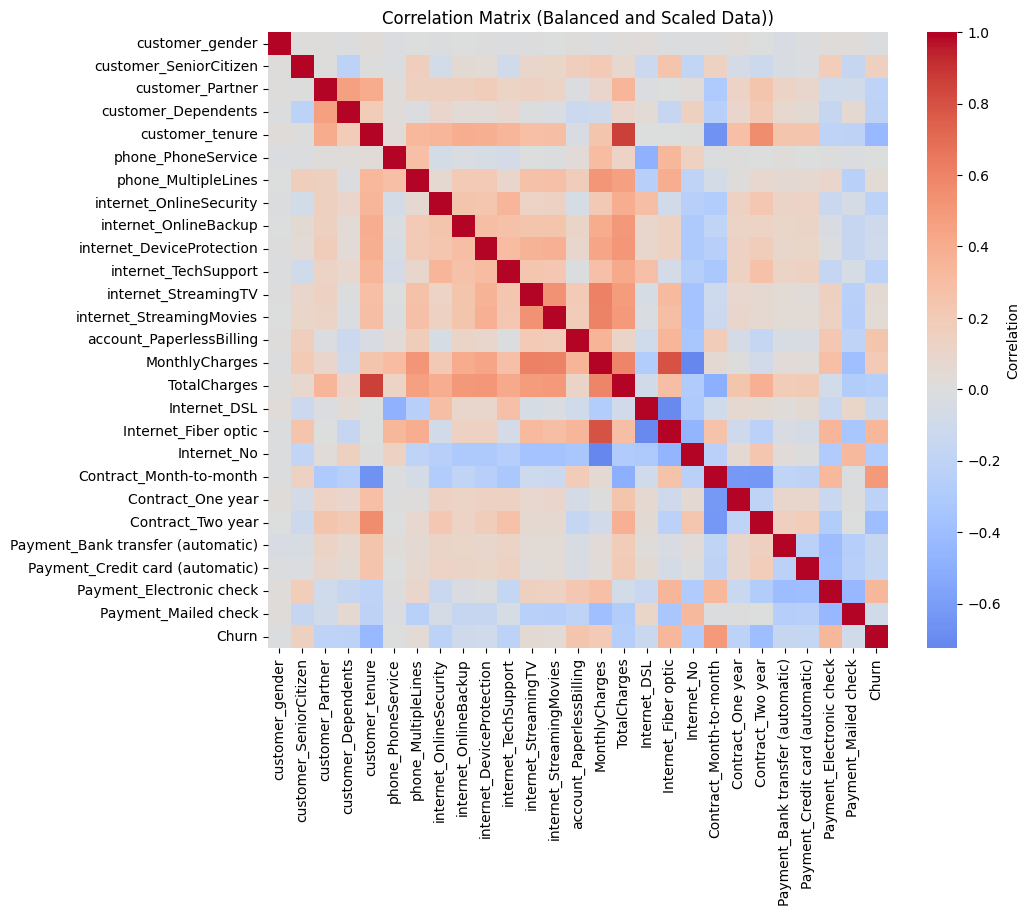

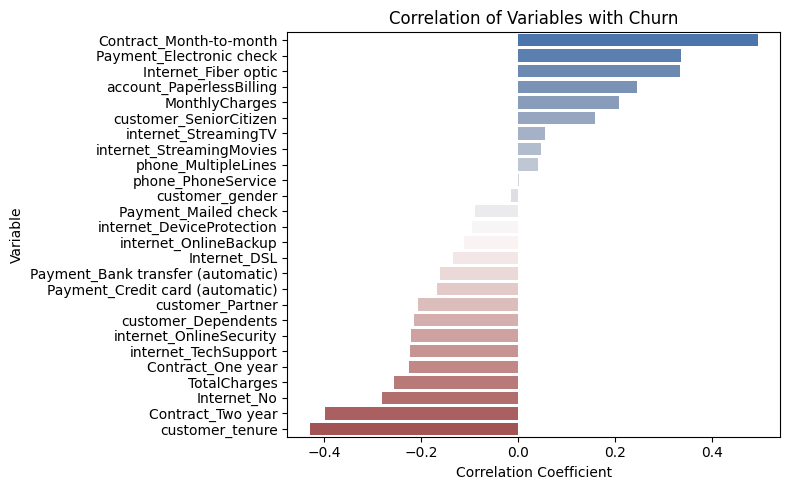

In [28]:
# 4. Show variables with the highest positive and negative correlation with Churn
top_pos = corr_with_churn[1:6]  # Skips 'Churn' which has correlation 1 with itself
top_neg = corr_with_churn[-5:]

print("Variables with the highest positive correlation with Churn:")
for var, val in top_pos.items():
    print(f" - {var}: {val:.3f} (higher probability of abandonment)")

print("\nVariables with the highest negative correlation with Churn:")
for var, val in top_neg.items():
    print(f" - {var}: {val:.3f} (lower probability of abandonment)")

# 5. Visualize complete correlation matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix (Balanced and Scaled Data))")
plt.show()

# 6. Visualize correlations with Churn in a tidy barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_churn.values[1:], y=corr_with_churn.index[1:], palette="vlag")
plt.title("Correlation of Variables with Churn")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


**Observations**

Variables such as month-to-month contracts, e-check payments, fiber optics, paperless billing, and high monthly fees are associated with higher churn.

In contrast, one- or two-year contracts, longer tenure, high total spending, and no internet access are linked to lower churn and higher loyalty.

-----

# 💡**Predictive Modeling**

Modeling process for those 5 models: Random Forest, XGBoost, Logistic Regression, LightGBM and KNN.


In [30]:
# optional: silence warnings
import warnings
warnings.filterwarnings("ignore")

# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#sklearn - modeling, metrics, and utilities
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# external models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# imbalanced-learn (if you use SMOTE or imblearn pipeline)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

## **Define models, tuning parameters, training pipeline and GridSearchCV**

In [31]:
# X_train_resampled, y_train_resampled, X_test_scaled, y_test

X_train = X_train_resampled
y_train = y_train_resampled
X_test = X_test_scaled

# Models
models = {
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Parameters for GridSearchCV
params = {
    "LogisticRegression": {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    "RandomForest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1]
    },
    "LightGBM": {
        'n_estimators': [100, 200],
        'max_depth': [-1, 10],
        'learning_rate': [0.01, 0.1]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

results = {}

# Train and evaluate
for name in models:
    print(f"\nTraining{name}...")

    grid = GridSearchCV(
        estimator=models[name],
        param_grid=params[name],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)
    y_proba = grid.predict_proba(X_test)[:, 1]

    print(f"Best parameters: {grid.best_params_}")
    print(f"ROC AUC test: {roc_auc_score(y_test, y_proba):.4f}")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'model': grid.best_estimator_,
        'best_params': grid.best_params_,
        'roc_auc': roc_auc_score(y_test, y_proba),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

# Metrics comparison table
metrics_list = []
for name, res in results.items():
    cr = res['classification_report']
    metrics_list.append({
        'Model': name,
        'ROC_AUC': res['roc_auc'],
        'Accuracy': cr['accuracy'],
        'Precision_1': cr['1']['precision'],
        'Recall_1': cr['1']['recall'],
        'F1_1': cr['1']['f1-score']
    })

metrics_df = pd.DataFrame(metrics_list)
print(metrics_df.sort_values(by='ROC_AUC', ascending=False))


TrainingLogisticRegression...
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
ROC AUC test: 0.8423
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.79      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409


TrainingRandomForest...
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
ROC AUC test: 0.8278
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.59      0.61      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.78      0.78      1409


TrainingXGBoost...
Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
ROC 

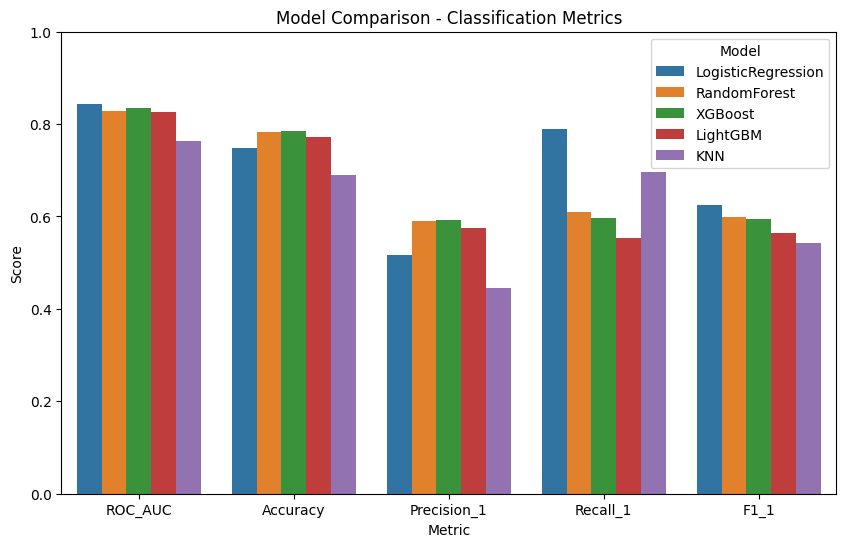

In [32]:
# Comparative chart
df_melted_new = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted_new, x="Metric", y="Score", hue="Model")
plt.title("Model Comparison - Classification Metrics")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.show()

## **Feature Importance and Graphics**

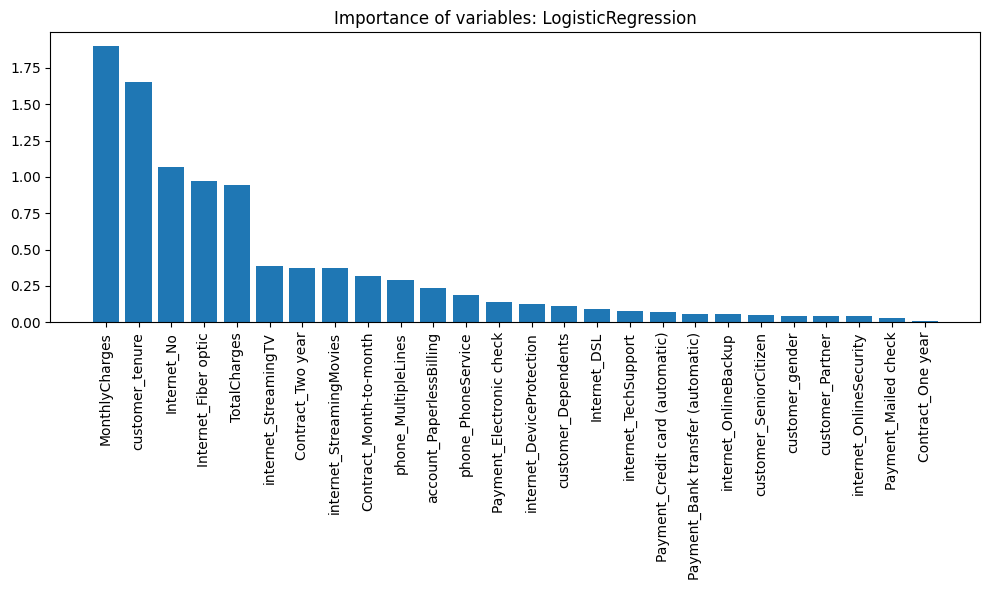

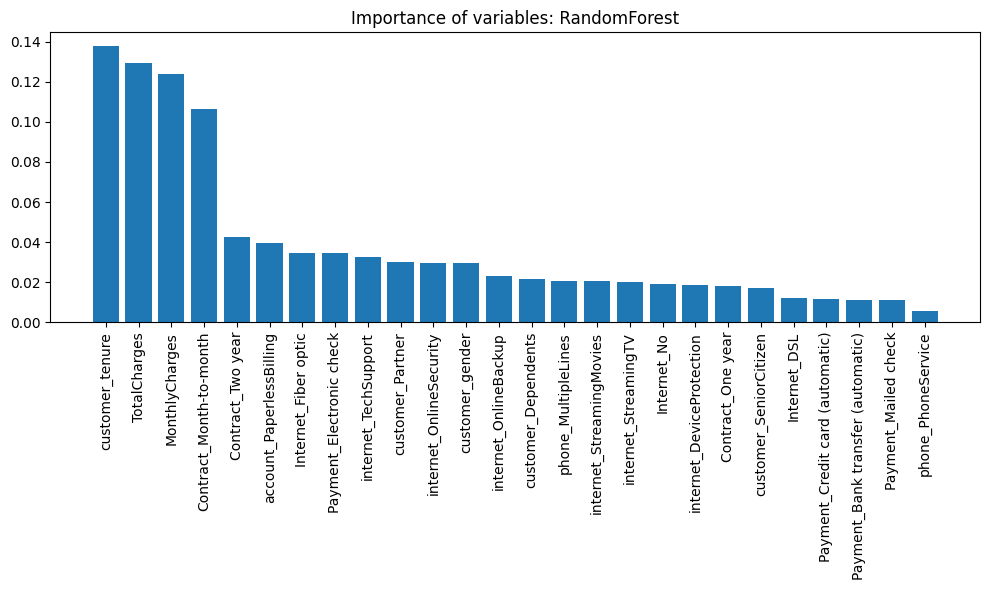

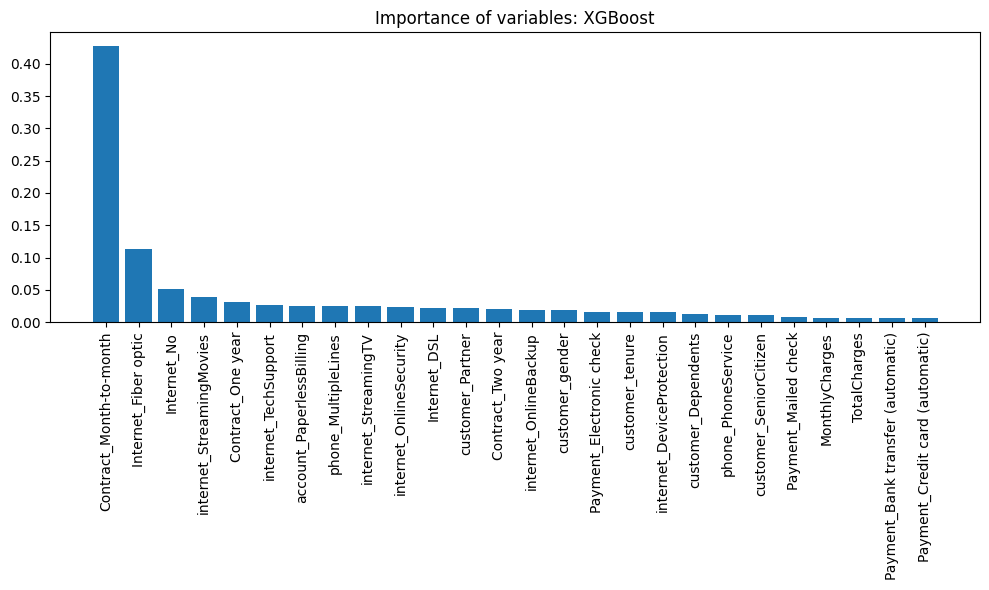

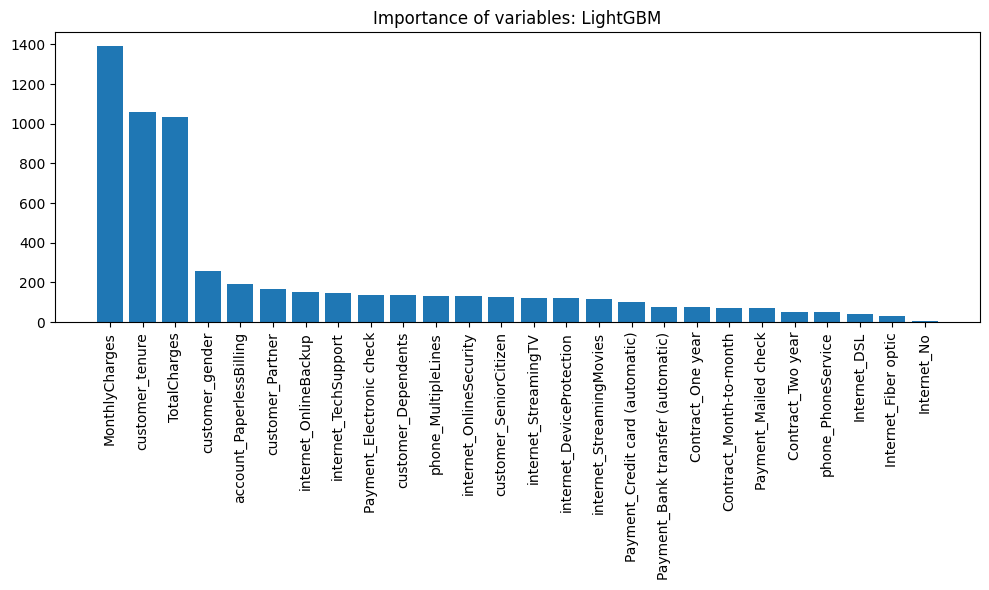

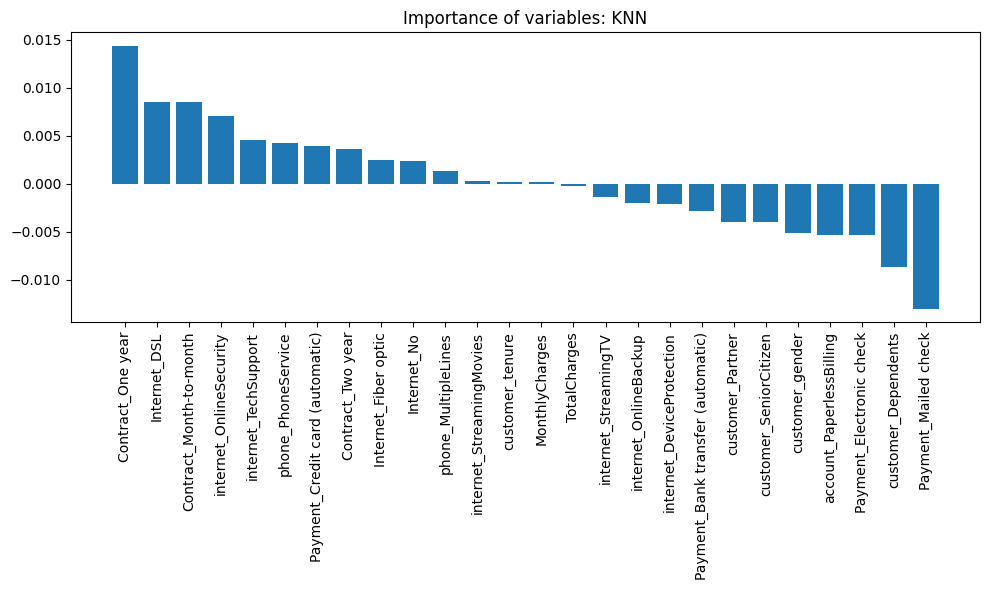

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

def plot_feature_importance(model, X, y, model_name):
    plt.figure(figsize=(10,6))

    if hasattr(model, 'named_steps'):
        model_step = list(model.named_steps.values())[-1]
    else:
        model_step = model  # It's a pure model, not a pipeline

    # Determine importance according to model type
    if hasattr(model_step, 'feature_importances_'):
        importances = model_step.feature_importances_
    elif hasattr(model_step, 'coef_'):
        importances = np.abs(model_step.coef_[0])
    elif model_name == 'KNN':
        r = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
        importances = r.importances_mean
    else:
        print(f"Model '{model_name}' does not support importance of variables.")
        return

   # Sort and print
    indices = np.argsort(importances)[::-1]
    features = X.columns

    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), features[indices], rotation=90)
    plt.title(f'Importance of variables: {model_name}')
    plt.tight_layout()
    plt.show()


# Execute
for name, res in results.items():
    plot_feature_importance(res['model'], X_test, y_test, name)



## **Compare metrics in table**

                Model   ROC_AUC  Accuracy  Precision_1  Recall_1      F1_1
0  LogisticRegression  0.842340  0.748048     0.516637  0.788770  0.624339
2             XGBoost  0.833986  0.784244     0.593085  0.596257  0.594667
1        RandomForest  0.827761  0.783534     0.589147  0.609626  0.599212
3            LightGBM  0.825141  0.772889     0.575000  0.553476  0.564033
4                 KNN  0.762918  0.689851     0.445969  0.695187  0.543365


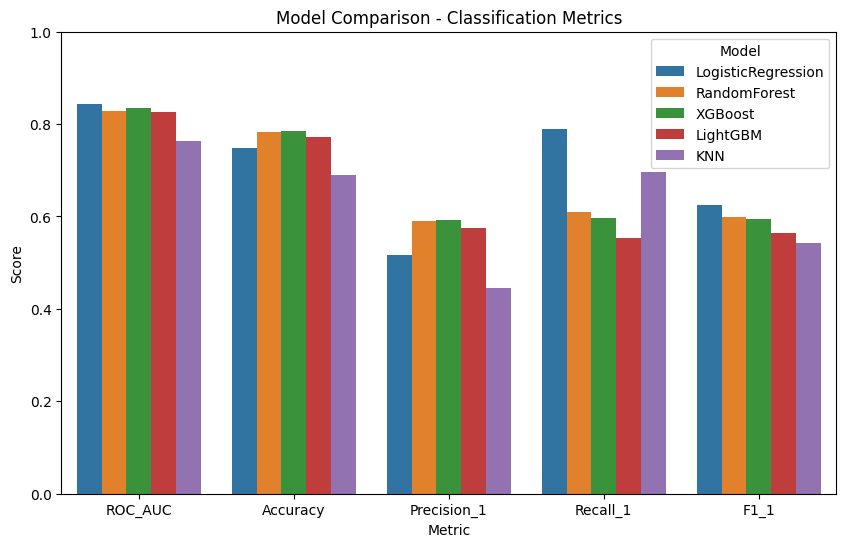

In [34]:
from sklearn.metrics import classification_report, roc_auc_score

metrics_list = [] # Empty list initialization

for name, res in results.items():
    cr = res['classification_report']
    metrics_list.append({
        'Model': name,
        'ROC_AUC': res['roc_auc'],
        'Accuracy': cr['accuracy'],
        'Precision_1': cr['1']['precision'],
        'Recall_1': cr['1']['recall'],
        'F1_1': cr['1']['f1-score']
    })

# DataFrame of the list of dictionaries
metrics_df = pd.DataFrame(metrics_list)

print(metrics_df.sort_values(by='ROC_AUC', ascending=False))

# Graphics
df_melted_new = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted_new, x="Metric", y="Score", hue="Model")
plt.title("Model Comparison - Classification Metrics")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.show()

**Observations**

* Logistic Regression has the best recall, indicating that it detects more real churn cases, although its accuracy is lower. This implies that it is a model that prioritizes not missing positive cases, but it could generate more false positives. Ideal if you want to capture as many churns as possible.

* XGBoost and Random Forest have very similar performance in ROC AUC and balanced metrics. Both are good options if you are looking for a balance between accuracy and recall. They are more complex models than Logistic Regression, and in this case, they do not significantly outperform logistic regression in recall.

* LightGBM has slightly lower metrics than XGBoost and Random Forest, but it is still competitive and can be useful if you are looking for speed and efficiency.

* KNN is the worst performing model, especially in accuracy and ROC AUC. This could be due to the model not handling the complexity or imbalance of the dataset well.

| Model | ROC\_AUC | Accuracy | Precision | Recall | F1 Score | Comment |
| ------------------ | -------- | -------- | --------- | ------ | -------- | ----------------------------- |
| LogisticRegression | 0.8423 | 0.7480 | 0.5166 | 0.7888 | 0.6243 | 🔝 Better recall, good balance |
| XGBoost | 0.8340 | 0.7842 | 0.5931 | 0.5963 | 0.5947 | ⚡ Good overall performance |
| RandomForest | 0.8279 | 0.7842 | 0.5907 | 0.6096 | 0.6000 | 🌲 Stable and consistent |
| LightGBM | 0.8251 | 0.7729 | 0.5750 | 0.5535 | 0.5640 | 💡 Lightweight but effective |
| KNN | 0.7629 | 0.6899 | 0.4460 | 0.6952 | 0.5434 | 🐢 Slower and less accurate |

📌 Overall conclusion

🔝 Logistic Regression: better for detecting churn, can produce false positives.

⚡ XGBoost and Random Forest: good balance and power for nonlinear models.

💡 LightGBM: fast and efficient option, although with a small sacrifice in metrics.

🐢 KNN: less recommended for this problem.

**Note:**

* If the priority is to capture the largest number of churns (high recall), Logistic Regression is the best option.

* If you want a model with a better balance between precision and recall, XGBoost or Random Forest may be preferable.

* The F1 score reflects the balance between precision and recall, with Random Forest having the highest value, followed by XGBoost, indicating that these models make a good trade-off.

------

## **Technical analysis of confusion matrices**

Confusion matrix— Logistic Regression:
[[759 276]
 [ 79 295]] 

Confusion matrix— Random Forest:
[[876 159]
 [146 228]] 

Confusion matrix— XGBoost:
[[882 153]
 [151 223]] 

Confusion matrix— LightGBM:
[[882 153]
 [167 207]] 

Confusion matrix— KNN:
[[712 323]
 [114 260]] 



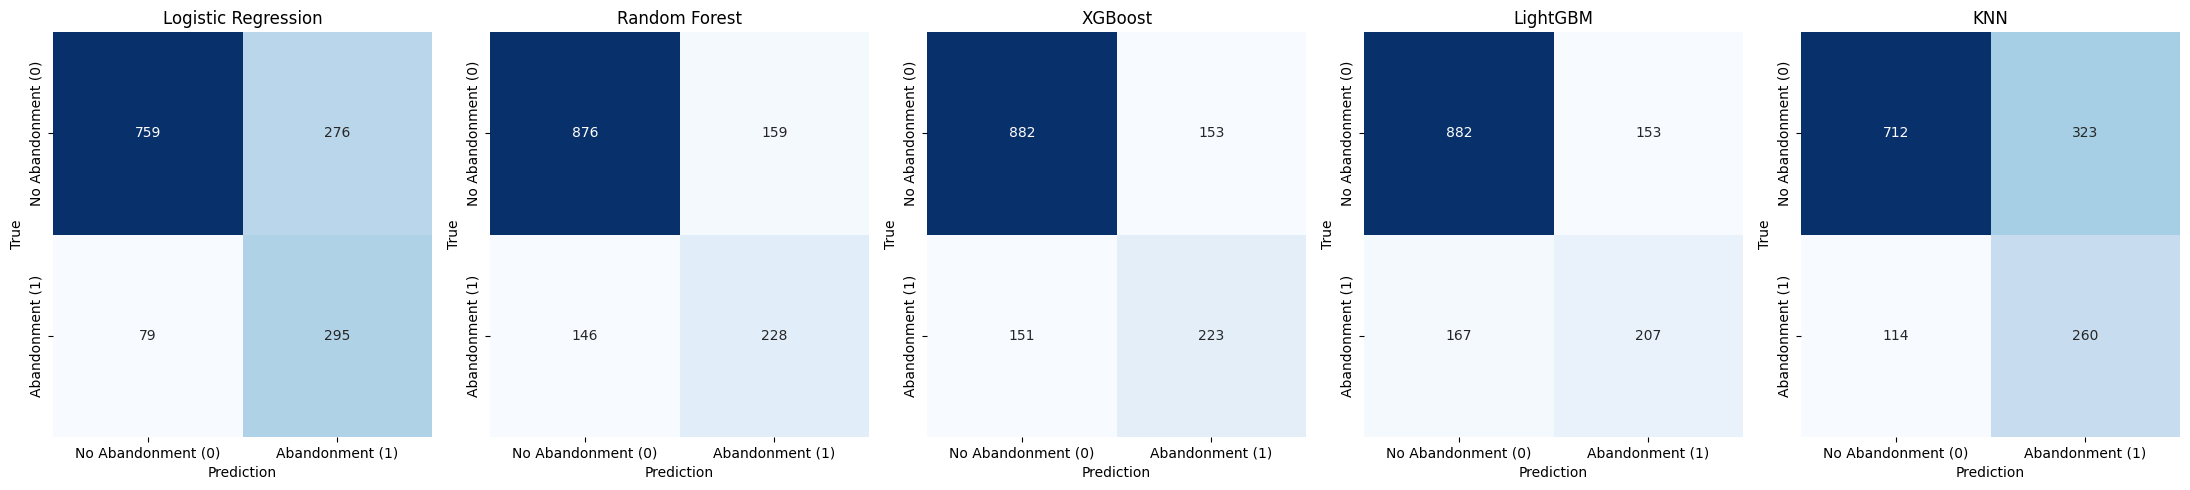

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.748048   0.516637  0.788770  0.624339
1        Random Forest  0.783534   0.589147  0.609626  0.599212
2              XGBoost  0.784244   0.593085  0.596257  0.594667
3             LightGBM  0.772889   0.575000  0.553476  0.564033
4                  KNN  0.689851   0.445969  0.695187  0.543365


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

model_dict = {
    "Logistic Regression": results["LogisticRegression"]["model"],
    "Random Forest": results["RandomForest"]["model"],
    "XGBoost": results["XGBoost"]["model"],
    "LightGBM": results["LightGBM"]["model"],
    "KNN": results["KNN"]["model"]
}


fig, axes = plt.subplots(1, len(model_dict), figsize=(22, 5))

results_list = []

for ax, (name, model) in zip(axes, model_dict.items()):

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Confusion matrix— {name}:")
    print(cm, "\n")

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(name)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('True')
    ax.set_xticks([0.5, 1.5])
    ax.set_yticks([0.5, 1.5])
    ax.set_xticklabels(['No Abandonment (0)', 'Abandonment (1)'])
    ax.set_yticklabels(['No Abandonment (0)', 'Abandonment (1)'])

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results_list.append([name, acc, prec, rec, f1])

plt.tight_layout()
plt.show()

df_results = pd.DataFrame(results_list, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(df_results)


**Observations**

* TN (True Negatives): Cases correctly classified as non-dropouts.

* FP (False Positives): Cases incorrectly classified as dropouts (false alarms).

* FN (False Negatives): Cases incorrectly classified as non-dropouts (undetected dropouts).

* TP (True Positives): Cases correctly classified as dropouts.

| Model | TN | FP | FN | TP | Observations 📝 |
| ------------------- | ------------------------------ | ---------------------- | ---------------------------- | --------------------------- | ----------------------------------------------------------------------------- |
| Logistic Regression | 759 | 276 | 79 | 295 | 🔍 Better at detecting dropouts (fewer ❌) but more false alarms (🚨) |
| Random Forest | 876 | 159 | 146 | 228 | 🌳 Better at avoiding false alarms (fewer 🚨), but misses more churns (❌) |
| XGBoost | 882 | 153 | 151 | 223 | ⚡ Similar to RF, good false alarm control, but more undetected churns |
| LightGBM | 882 | 153 | 167 | 207 | 🍃 More conservative, far fewer false alarms, but more undetected churns |
| KNN | 712 | 323 | 114 | 260 | 👟 Worse balance, many false alarms and missed churns |

* Logistic Regression has the lowest FN, meaning it's better at detecting true churn (fewer undetected churns), but at the cost of more FP.

* Random Forest and XGBoost have higher TN (more well-identified negative cases) and lower FP than Logistic Regression, but they have more FN, so they miss more churns.

* LightGBM misses even more churns and maintains a high TN.

* KNN has a worse balance, with many FP and FN.

👉 In summary:

* If the goal is to minimize actual customer churn (low false negatives), Logistic Regression is better.

* If you want to minimize the cost of false alarms (low false positives), XGBoost or Random Forest are better.

-------

# 🚀**Model Improvement**

* Tuning is prioritized for LightGBM and Random Forest to improve recall without sacrificing excessive precision.

* Logistic Regression is reviewed and optimized to better balance recall and precision.

* Evaluate whether it is worth keeping KNN or discarding it based on performance.

---------
### **General steps for each model (KNN, LightGBM, Random Forest, Logistic Regression, XGBoost):**

**1. Data Preparation**

* Scale variables with StandardScaler using only the training set.

* Apply SMOTE to balance classes in training.

* Transform the test set with the same scaler (without SMOTE).

**2. Pipeline Construction**

* Create a pipeline that includes the scaler, SMOTE, and the model.

* Allows preprocessing to be integrated into cross-validation and training.

**3. Hyperparameter Tuning**

* Use GridSearchCV with ROC AUC metric to find optimal parameters.

* Cross-validation to avoid overfitting.

**4. Test Evaluation**

* Predict probabilities and classes with the best model.

* Calculate metrics: accuracy, precision, recall, f1-score, ROC AUC.

* Generate classification report.

* Calculate and graph confusion matrix.

* Graph individual ROC curves.

**5. Global Comparison**

* Overlay all ROC curves on a single graph to compare models.

**6. Model Saving**

* Save the trained model and its parameters for future use.

------


## **Model Definition, Parameters for Improving Them, Training and Evaluation**

In [36]:
# ======================
# IMPORTS
# ======================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# ======================
# 1. RAW DATA SPLIT
# ======================
X = df.drop(columns='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ======================
# 2. DEFINITION OF MODELS AND PARAMETERS
# ======================
model_params = {
    "LogisticRegression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {
            'model__C': [0.1, 1, 10],
            'model__penalty': ['l2'],
            'model__solver': ['liblinear']
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 5]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            'model__n_estimators': [100, 200],
            'model__max_depth': [3, 6],
            'model__learning_rate': [0.01, 0.1]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=42),
        "params": {
            'model__n_estimators': [100, 200],
            'model__max_depth': [-1, 10],
            'model__learning_rate': [0.01, 0.1]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'model__n_neighbors': [3, 5, 7, 9],
            'model__weights': ['uniform', 'distance'],
            'model__metric': ['euclidean', 'manhattan']
        }
    }
}

# ======================
# 3. TRAINING AND EVALUATION
# ======================
results = []

for name, mp in model_params.items():
    print(f"\n🔹 Training {name}...")

    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', mp["model"])
    ])

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=mp["params"],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)
    y_prob = grid.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"Best parameters: {grid.best_params_}")
    print(f"ROC AUC test: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))

    results.append({
        'Model': name,
        'ROC_AUC': roc_auc,
        'Accuracy': acc,
        'Precision_1': prec,
        'Recall_1': rec,
        'F1_1': f1,
        'model': grid.best_estimator_,   # Trained pipeline model
        'y_pred': y_pred,                # Predictions in test
        'y_prob': y_prob                 # Probabilities in test
    })

    joblib.dump(grid.best_estimator_, f"{name}_best_model.pkl")


🔹 Training LogisticRegression...
Best parameters: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
ROC AUC test: 0.8425
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409


🔹 Training RandomForest...
Best parameters: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 200}
ROC AUC test: 0.8411
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1035
           1       0.56      0.72      0.63       374

    accuracy                           0.78      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.78      0.78      1409


🔹 Training XGBoost...
Best parameters: {'model__learn

## **Charts and Analysis**


📊 Model comparison:
                Model   ROC_AUC  Accuracy  Precision_1  Recall_1      F1_1  \
2             XGBoost  0.845455  0.782825     0.574561  0.700535  0.631325   
3            LightGBM  0.843091  0.774308     0.559574  0.703209  0.623223   
0  LogisticRegression  0.842511  0.743790     0.511304  0.786096  0.619600   
1        RandomForest  0.841062  0.775727     0.560166  0.721925  0.630841   
4                 KNN  0.794007  0.713982     0.474606  0.724599  0.573545   

                                               model  \
2  (StandardScaler(), SMOTE(random_state=42), XGB...   
3  (StandardScaler(), SMOTE(random_state=42), LGB...   
0  (StandardScaler(), SMOTE(random_state=42), Log...   
1  (StandardScaler(), SMOTE(random_state=42), (De...   
4  (StandardScaler(), SMOTE(random_state=42), KNe...   

                                              y_pred  \
2  [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...   
3  [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...   
0  [1

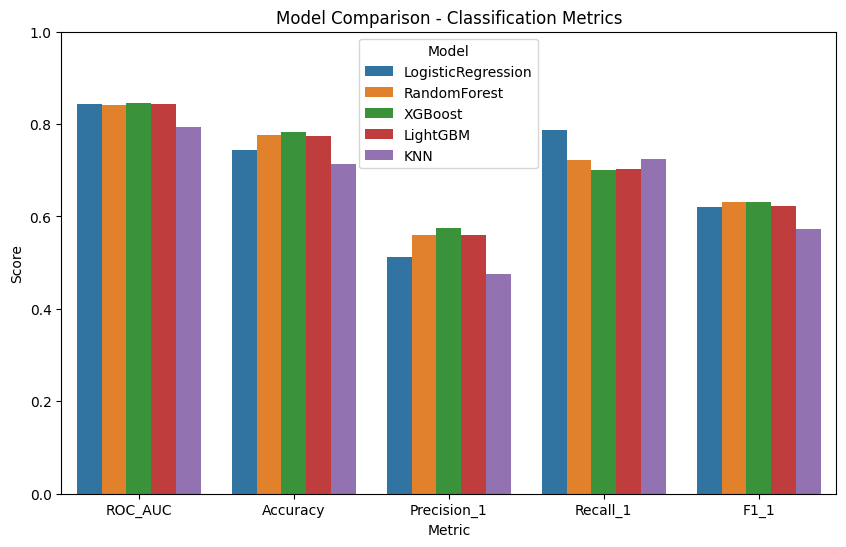

In [37]:
# ======================
# 4. COMPARATIVE TABLE
# ======================
metrics_df = pd.DataFrame(results)
print("\n📊 Model comparison:")
print(metrics_df.sort_values(by='ROC_AUC', ascending=False))

# ======================
# 5. METRICS GRAPH
# ======================
metrics_to_plot = ['Model', 'ROC_AUC', 'Accuracy', 'Precision_1', 'Recall_1', 'F1_1']

metrics_df_filtered = metrics_df[metrics_to_plot]

df_melted = metrics_df_filtered.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model")
plt.title("Model Comparison - Classification Metrics")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.show()



Confusion Matrix- LogisticRegression:
[[754 281]
 [ 80 294]]


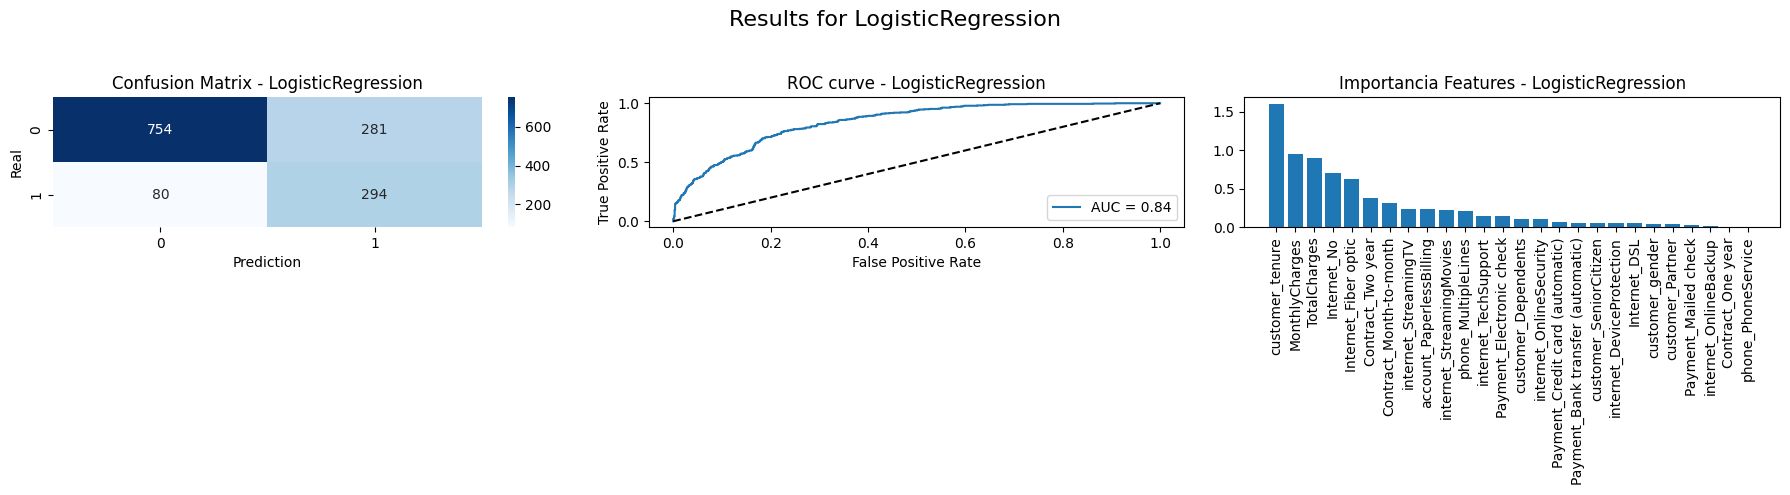


Confusion Matrix- RandomForest:
[[823 212]
 [104 270]]


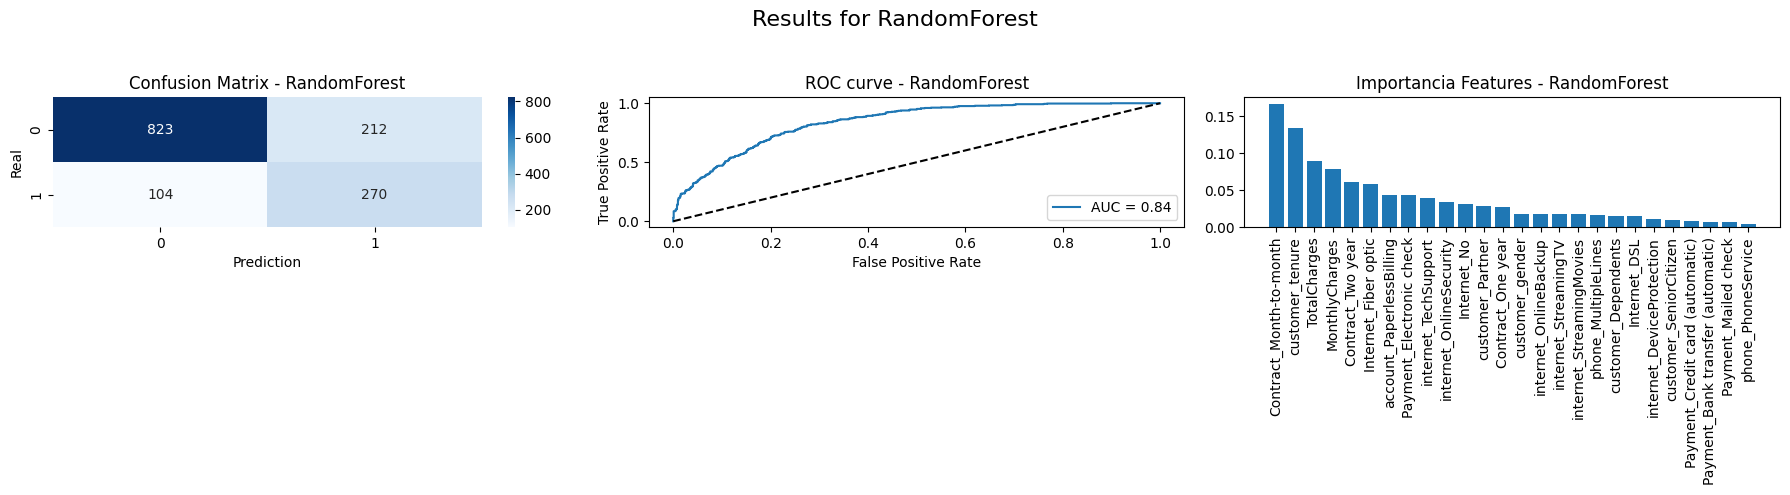


Confusion Matrix- XGBoost:
[[841 194]
 [112 262]]


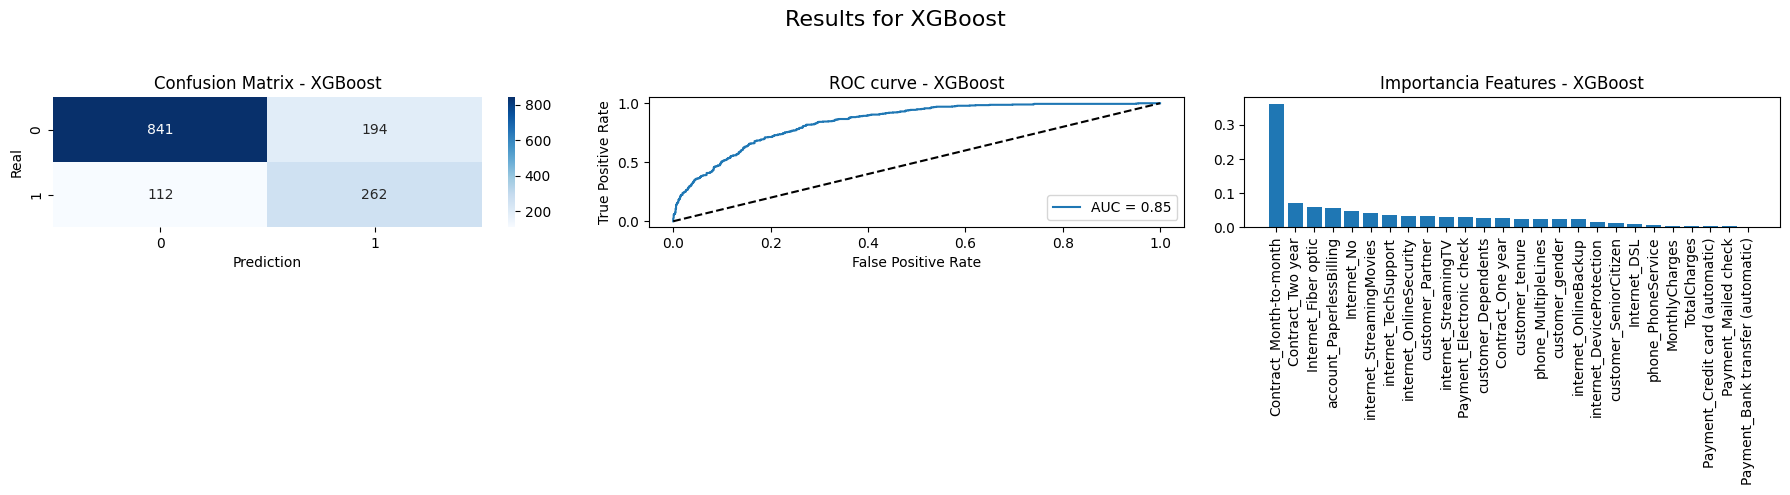


Confusion Matrix- LightGBM:
[[828 207]
 [111 263]]


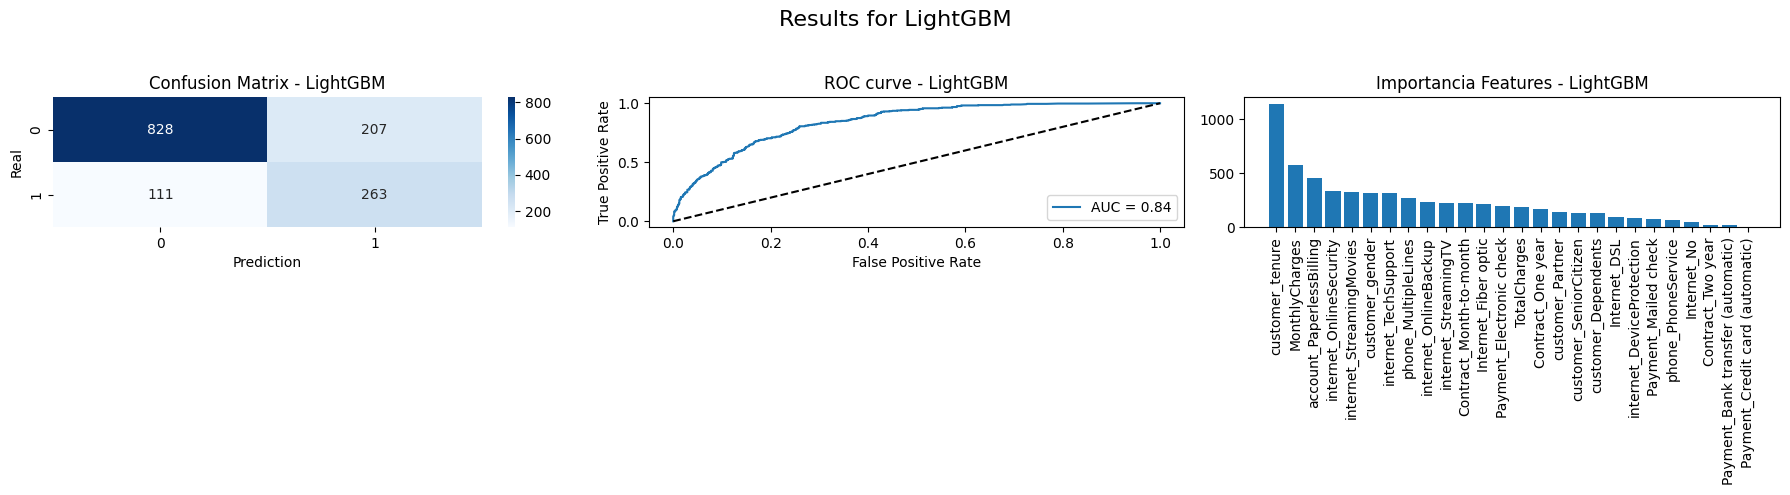


Confusion Matrix- KNN:
[[735 300]
 [103 271]]


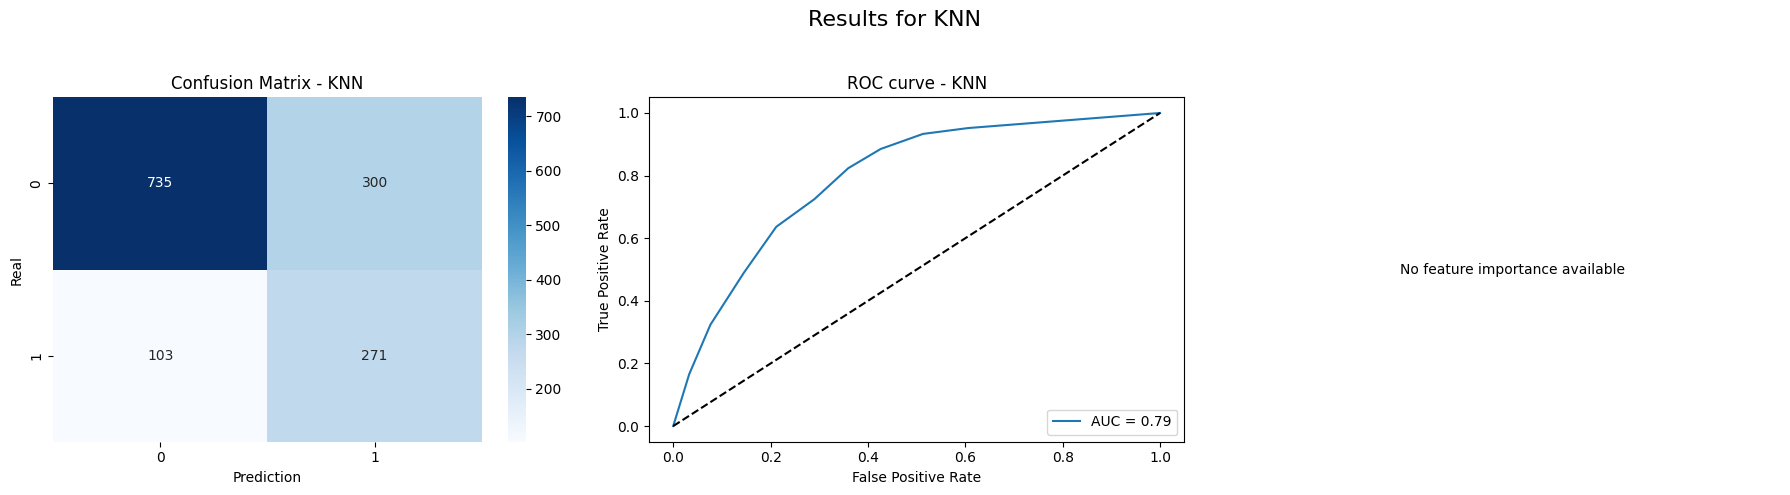

In [38]:
# ======================
# 6. GRAPHICS AND ANALYSIS
# ======================
from sklearn.metrics import auc


# --- Graphing Functions ---
def plot_confusion_matrix_ax(y_true, y_pred, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Real')

def plot_roc_curve_ax(y_true, y_prob, ax, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc_val = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'AUC = {roc_auc_val:.2f}')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_title(title)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')

def plot_feature_importance_ax(model, feature_names, ax, title):
   # We access the internal model of the pipeline
    clf = model.named_steps['model']

    if hasattr(clf, "feature_importances_"):
        importances = clf.feature_importances_
    elif hasattr(clf, "coef_"):
        importances = np.abs(clf.coef_[0])
    else:
        ax.text(0.5, 0.5, "No feature importance available", ha='center', va='center')
        ax.axis('off')
        return

    indices = np.argsort(importances)[::-1]
    ax.bar(range(len(importances)), importances[indices])
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(feature_names[indices], rotation=90)
    ax.set_title(title)

# --- Graph ---
roc_curves = {}

for res in results:
    name = res['Model']
    model = res['model']
    y_pred = res['y_pred']
    y_prob = res['y_prob']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    plt.suptitle(f"Results for {name}", fontsize=16)

  # Print confusion matrix to console
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix- {name}:")
    print(cm)

    plot_confusion_matrix_ax(y_test, y_pred, axes[0], f"Confusion Matrix - {name}")
    plot_roc_curve_ax(y_test, y_prob, axes[1], f"ROC curve - {name}")
    plot_feature_importance_ax(model, X.columns, axes[2], f"Importancia Features - {name}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

   # Save data for global ROC comparison
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc_val = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, roc_auc_val)


# ⚖️**Selected Model**

## **Comparison of Improved Models**

The following labels are used:

✅ Good / Stable / Outstanding

🔼 High / Improvement

🔽 Low / Room for Improvement


### **Comparison by Metric**

| Model | ROC AUC | Accuracy | Precision | Recall | F1 Score | Short Look |
| ---------------------- | -------- | -------- | --------- | -------- | -------- | ------------------------------------------------------------------------- |
| **XGBoost** | 0.845 ✅ | 0.783 ✅ | 0.575 ✅ | 0.701 ✅ | 0.631 ✅ | 🚀 Better ROC AUC and good precision-recall balance. Great overall choice. |
| **LightGBM** | 0.843 ✅ | 0.774 ✅ | 0.560 ✅ | 0.703 ✅ | 0.623 ✅ | ⚡ Similar to XGBoost, good recall for catching dropouts. |
| **LogisticRegression** | 0.843 ✅ | 0.744 🔽 | 0.511 🔽 | 0.786 🔼 | 0.620 ✅ | 🔍 High recall, detects more dropouts, but lower accuracy. |
| **RandomForest** | 0.841 ✅ | 0.776 ✅ | 0.560 ✅ | 0.722 ✅ | 0.631 ✅ | 🌳 Solid balance, very competitive with XGBoost and LightGBM. |
| **KNN** | 0.794 🔽 | 0.714 🔽 | 0.475 🔽 | 0.725 ✅ | 0.574 🔽 | 🐢 Lower overall performance, may be dropped for production. |


**Observations**

✅ XGBoost has the best balance in recall and F1 score.

🔼 Logistic Regression excels in recall, although its precision is lower.

🔽 KNN has the lowest precision, but acceptable recall.

🟡 Random Forest and LightGBM have similar metrics, but with lower recall and F1 compared to XGBoost.

-----

### **Comparison by confusion matrix**

| Model | TN | FP | FN | TP | Observations |
| ---------------------- | --- | --- | --- | --- | ----------------------------------------------------------------------------- |
| **KNN** | 735 | 300 | 103 | 271 | 🔼 Good Recall (high TP) <br> 🔽 Many False Positives (high FP) |
| **LightGBM** | 828 | 207 | 111 | 263 | ✅ Good balance <br> 🔽 Somewhat more FN than KNN, but less FP |
| **XGBoost** | 841 | 194 | 112 | 262 | ✅ Better TN (low FP) <br> 🔽 FN similar to LightGBM |
| **RandomForest** | 823 | 212 | 104 | 270 | ✅ Balanced <br> 🔼 FN slightly better than XGBoost |
| **LogisticRegression** | 754 | 281 | 80 | 294 | ✅ Better FN (fewer false negatives) <br> 🔼 More FP (risk of higher costs) |

**Observations**

* Logistic Regression has the lowest number of false negatives, ideal if we want to ensure we detect the largest number of customers who are going to abandon (minimize losses), although it increases false positives (possible additional cost). ✅🔼

* XGBoost and RandomForest offer a good balance between TN and FN, with lower FP than Logistic Regression. ✅

* KNN has more false positives, which can generate unnecessary alerts. 🔽

* LightGBM is also fairly balanced, but with slightly more false negatives than Logistic Regression. 🔽

------

## **Creating an Ensemble Model**

The ensemble model is a stacking model using XGBoost + Random Forest + Logistic Regression.

The Stacking combination option is selected.

Note: Combining models (ensembles) can improve overall robustness and accuracy by leveraging the distinct strengths of each model and compensating for their weaknesses.

Classification report - Stacking (XGB + RF + LR):
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1035
           1       0.58      0.62      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409

Confusion Matrix:
[[863 172]
 [141 233]]


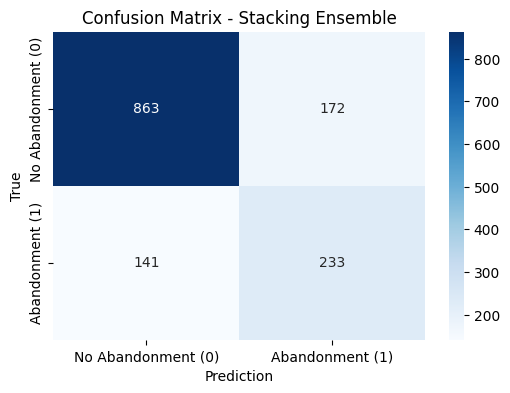

ROC AUC: 0.8341


In [39]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# 1. Define base models with already adjusted parameters
estimators = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# 2. Define stacking with LR as a meta-model
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    n_jobs=-1,
    passthrough=False
)

#3. Pipeline with SMOTE + Scaling + Stacking
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('stacking', stacking_clf)
])

# 4. Train the complete pipeline
pipeline.fit(X_train, y_train)

# 5. Predict with pipeline (use scaling and stacking together)
y_pred_stacking = pipeline.predict(X_test)
y_prob_stacking = pipeline.predict_proba(X_test)[:,1]

# 6. Metrics and reporting (consistent and without confusion)
print("Classification report - Stacking (XGB + RF + LR):")
print(classification_report(y_test, y_pred_stacking))

cm = confusion_matrix(y_test, y_pred_stacking)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Abandonment (0)', 'Abandonment (1)'],
            yticklabels=['No Abandonment (0)', 'Abandonment (1)'])
plt.title('Confusion Matrix - Stacking Ensemble')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

roc_auc = roc_auc_score(y_test, y_prob_stacking)
print(f"ROC AUC: {roc_auc:.4f}")

acc = accuracy_score(y_test, y_pred_stacking)
prec = precision_score(y_test, y_pred_stacking)
rec = recall_score(y_test, y_pred_stacking)
f1 = f1_score(y_test, y_pred_stacking)

results.append({
    'Model': 'Stacking Ensemble',
    'ROC_AUC': roc_auc,
    'Accuracy': acc,
    'Precision_1': prec,
    'Recall_1': rec,
    'F1_1': f1,
    'model': pipeline,
    'y_pred': y_pred_stacking,
    'y_prob': y_prob_stacking
})


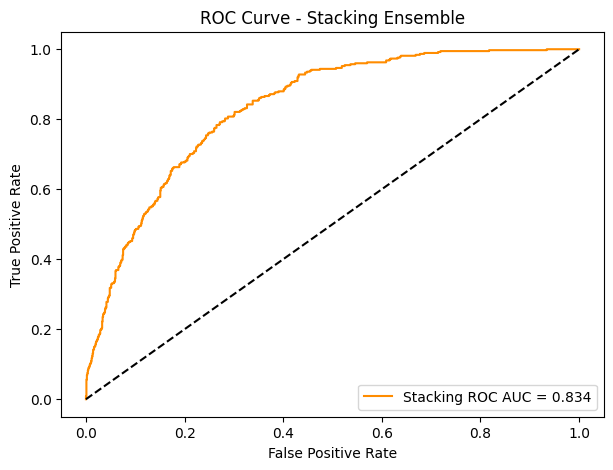

['stacking_pipeline.pkl']

In [40]:
# 7.ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_stacking)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Stacking ROC AUC = {roc_auc:.3f}', color='darkorange')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Ensemble')
plt.legend(loc='lower right')
plt.show()

# 8. Save the entire pipeline (including SMOTE and scaler)
joblib.dump(pipeline, "stacking_pipeline.pkl")

**Stacking Model Observations**

* Ensemble improves overall stability by combining the strengths of XGBoost, Random Forest, and Logistic Regression.

* It detects churning customers reasonably well (recall 62%), but with a certain false positive rate (accuracy 58%).

* It can be a good option if you prioritize a balance between minimizing churn losses and avoiding excessive spending on misclassified customers.

* To improve, you could explore adjusting decision thresholds or specific cost-benefit strategies based on your business.

## 🏆**Model Selection**

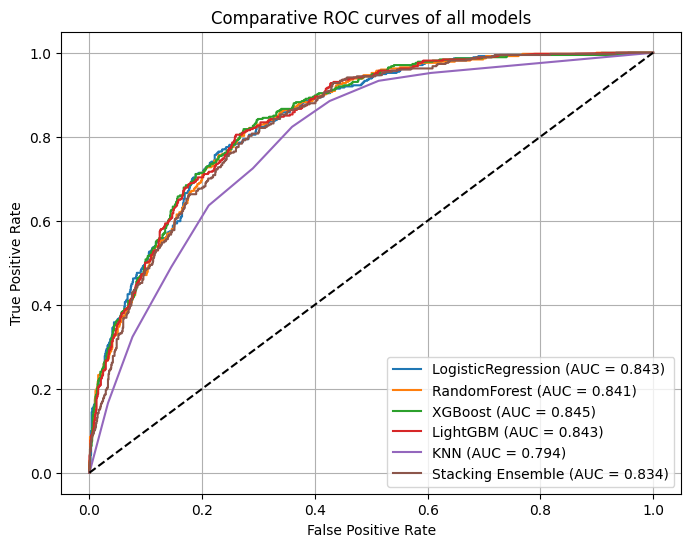

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import (
    roc_curve, roc_auc_score,
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve, average_precision_score
)

summary = []
plt.figure(figsize=(8,6))

# 1. ROC curves
for res in results:
    name = res['Model']
    y_pred = res['y_pred']
    y_prob = res['y_prob']

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_val = roc_auc_score(y_test, y_prob)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    ap = average_precision_score(y_test, y_prob)

    summary.append([name, acc, prec, rec, f1, auc_val, ap])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_val:.3f})')

plt.plot([0,1], [0,1], 'k--')
plt.title('Comparative ROC curves of all models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


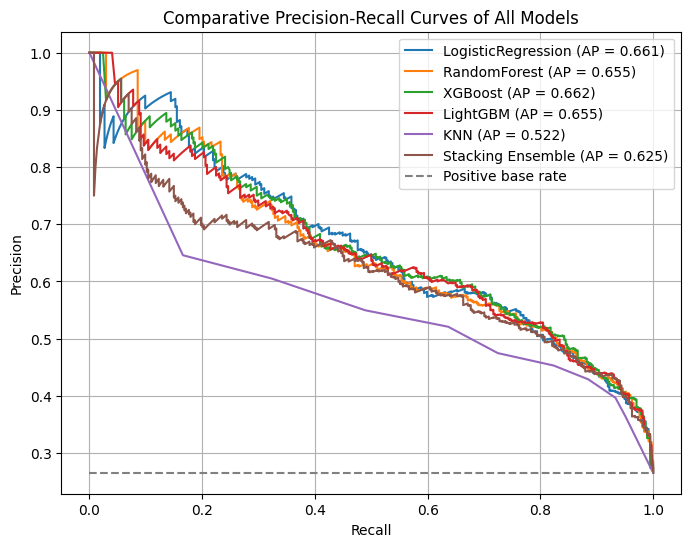

In [49]:
# 2. Precision-Recall Curves
plt.figure(figsize=(8,6))
for res in results:
    name = res['Model']
    y_prob = res['y_prob']
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f'{name} (AP = {ap:.3f})')

positive_rate = y_test.mean()
plt.hlines(positive_rate, 0, 1, colors='gray', linestyles='--', label='Positive base rate')
plt.title('Comparative Precision-Recall Curves of All Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


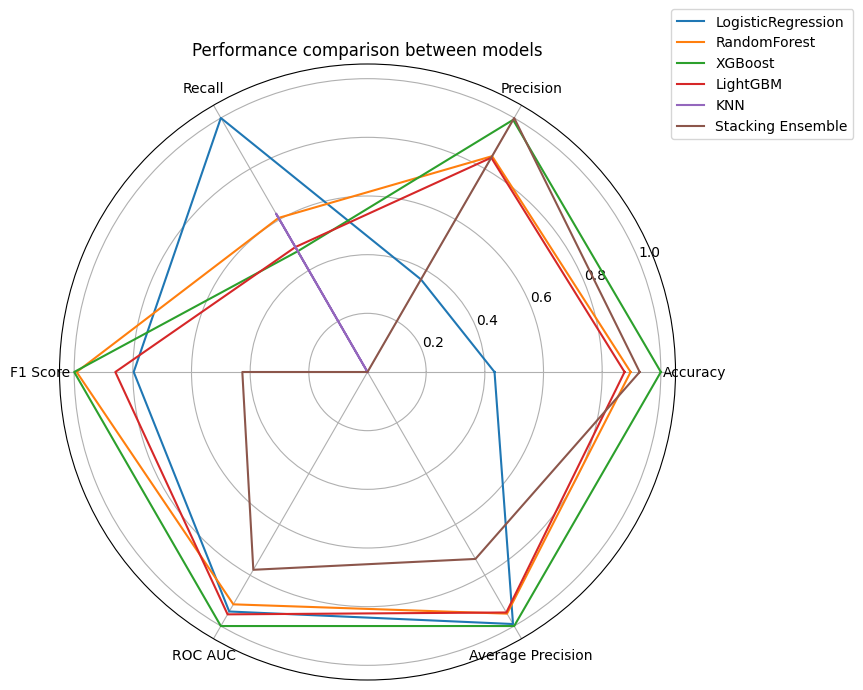

Summary of metrics by model:
                Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
2             XGBoost  0.782825   0.574561  0.700535  0.631325  0.845455   
0  LogisticRegression  0.743790   0.511304  0.786096  0.619600  0.842511   
1        RandomForest  0.775727   0.560166  0.721925  0.630841  0.841062   
3            LightGBM  0.774308   0.559574  0.703209  0.623223  0.843091   
5   Stacking Ensemble  0.777857   0.575309  0.622995  0.598203  0.834063   
4                 KNN  0.713982   0.474606  0.724599  0.573545  0.794007   

   Average Precision  
2           0.662018  
0           0.660913  
1           0.655186  
3           0.654540  
5           0.625009  
4           0.521887  


In [50]:
#  3. Radar Chart
df_summary = pd.DataFrame(summary, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Average Precision'])

# Normalize metrics for radar
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Average Precision']
df_norm = df_summary.copy()
for col in metrics:
    df_norm[col] = (df_norm[col] - df_norm[col].min()) / (df_norm[col].max() - df_norm[col].min())

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8,8))
for i, row in df_norm.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    plt.polar(angles, values, label=row['Model'])
plt.xticks(angles[:-1], metrics)
plt.title('Performance comparison between models')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


print("Summary of metrics by model:")
print(df_summary.sort_values(by='Average Precision', ascending=False))


📊 Model comparison:
                Model   ROC_AUC  Accuracy  Precision_1  Recall_1      F1_1  \
2             XGBoost  0.845455  0.782825     0.574561  0.700535  0.631325   
3            LightGBM  0.843091  0.774308     0.559574  0.703209  0.623223   
0  LogisticRegression  0.842511  0.743790     0.511304  0.786096  0.619600   
1        RandomForest  0.841062  0.775727     0.560166  0.721925  0.630841   
5   Stacking Ensemble  0.834063  0.777857     0.575309  0.622995  0.598203   
4                 KNN  0.794007  0.713982     0.474606  0.724599  0.573545   

                                               model  \
2  (StandardScaler(), SMOTE(random_state=42), XGB...   
3  (StandardScaler(), SMOTE(random_state=42), LGB...   
0  (StandardScaler(), SMOTE(random_state=42), Log...   
1  (StandardScaler(), SMOTE(random_state=42), (De...   
5  (SMOTE(random_state=42), StandardScaler(), Sta...   
4  (StandardScaler(), SMOTE(random_state=42), KNe...   

                                       

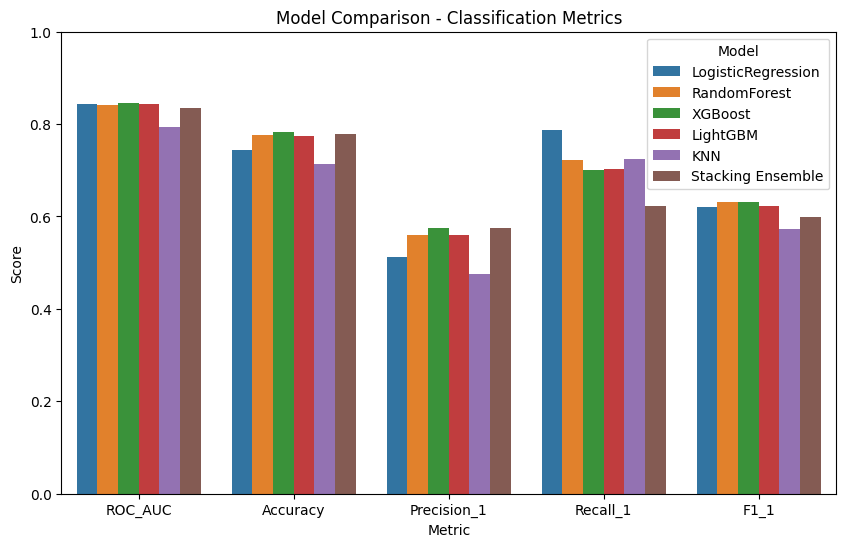

In [51]:
#  4. Comparison table by metrics

metrics_df = pd.DataFrame(results)
print("\n📊 Model comparison:")
print(metrics_df.sort_values(by='ROC_AUC', ascending=False))

metrics_to_plot = ['Model', 'ROC_AUC', 'Accuracy', 'Precision_1', 'Recall_1', 'F1_1']

metrics_df_filtered = metrics_df[metrics_to_plot]

df_melted = metrics_df_filtered.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model")
plt.title("Model Comparison - Classification Metrics")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.show()

**Observations**

Stacking Ensemble slightly improves precision, meaning it reduces false positives, compared to models like XGBoost and Random Forest.

However, its recall is lower than that of XGBoost, LightGBM, and Random Forest, meaning it misses more positive cases—it may miss more genuine dropouts.

Stacking's F1 score is lower than that of XGBoost and Random Forest, indicating that the overall balance between precision and recall is not improved.

Furthermore, its ROC AUC is the lowest among the leading models, indicating a lower ability to discriminate between classes.

------



## **Conclusion of the comparative model analysis**

Analyzing the performance of the different models on the test set, we can highlight the following:

* XGBoost: Better ROC AUC (0.845) and a good balance between precision (0.57) and recall (0.70), indicating a good ability to identify positive cases with reasonable accuracy.

* LightGBM: Similar performance to XGBoost, with slightly lower precision (0.56) and recall (0.70), also very competitive.

* Logistic Regression: Higher recall (0.79) but lower precision (0.51). It detects many positives but with more false positives; useful if we prioritize not missing positive cases.

* Random Forest: Good balance, intermediate precision and recall (0.56 and 0.72), solid and stable performance.

* Stacking Ensemble: Improves precision (0.58) but lowers recall (0.62), which can mean fewer false positives but more false negatives; ROC AUC is somewhat lower.

* KNN: Worse overall performance, with lower accuracy (0.71), precision (0.47), and ROC AUC (0.79); less recommended for this case.

-----

## **Final Recommendation**

Stacking Ensemble combines the strengths of the base models well, achieving a good compromise between precision, recall, and accuracy. It is a strong candidate if you are looking to maximize overall performance.

However, if the priority is to maximize positive class detection (recall), **Random Forest or XGBoost may be better options**.

If you are looking for a model with high precision to reduce false positives, LightGBM or ensemble would be preferable.

-----

## **Graphics of the chosen model**

### **SHAP summary plot (beeswarm)**

Analysis of the graph for the 10 most important variables in the model.

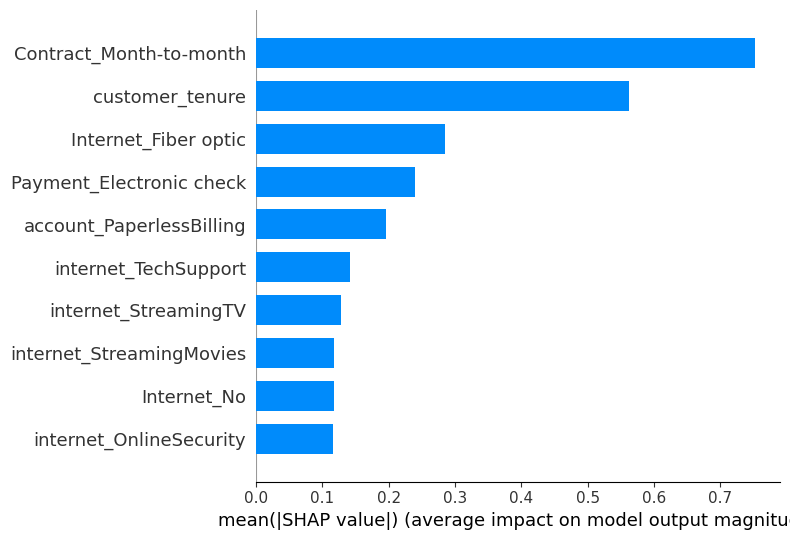

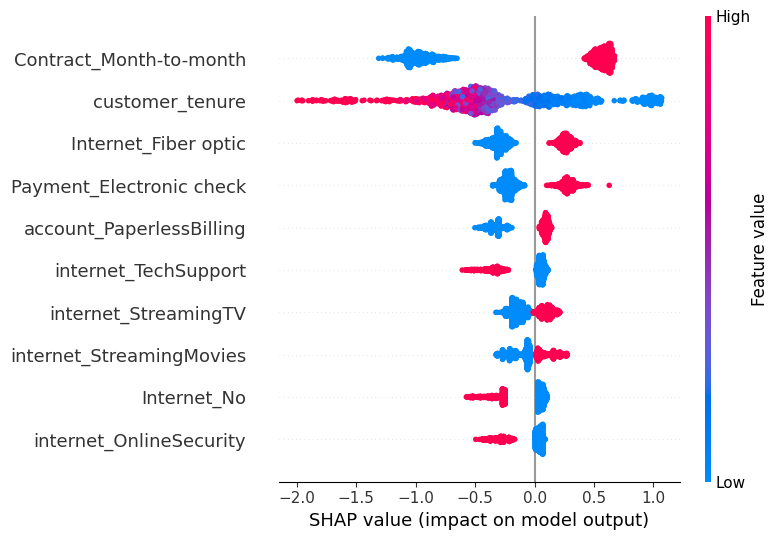

In [42]:
import shap
import pandas as pd

# Find the XGBoost model in the results list
xgb_result = next(res for res in results if res['Model'] == 'XGBoost')

# Get the trained pipeline
pipeline_xgb = xgb_result['model']

# Extract the pure xgboost model and scaler from the pipeline
xgb_model = pipeline_xgb.named_steps['model']
scaler = pipeline_xgb.named_steps['scaler']

# Scale X_test with the pipeline scaler
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame so SHAP has the column names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Create SHAP explainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Get SHAP values for the positive (binary) class
shap_values = explainer.shap_values(X_test_scaled_df)

# Graph overall summary (bars)
shap.summary_plot(shap_values, X_test_scaled_df, plot_type='bar', max_display=10)

# Graph global summary (beeswarm)
shap.summary_plot(shap_values, X_test_scaled_df, max_display=10)


### **Correlation matrix (Pearson)**

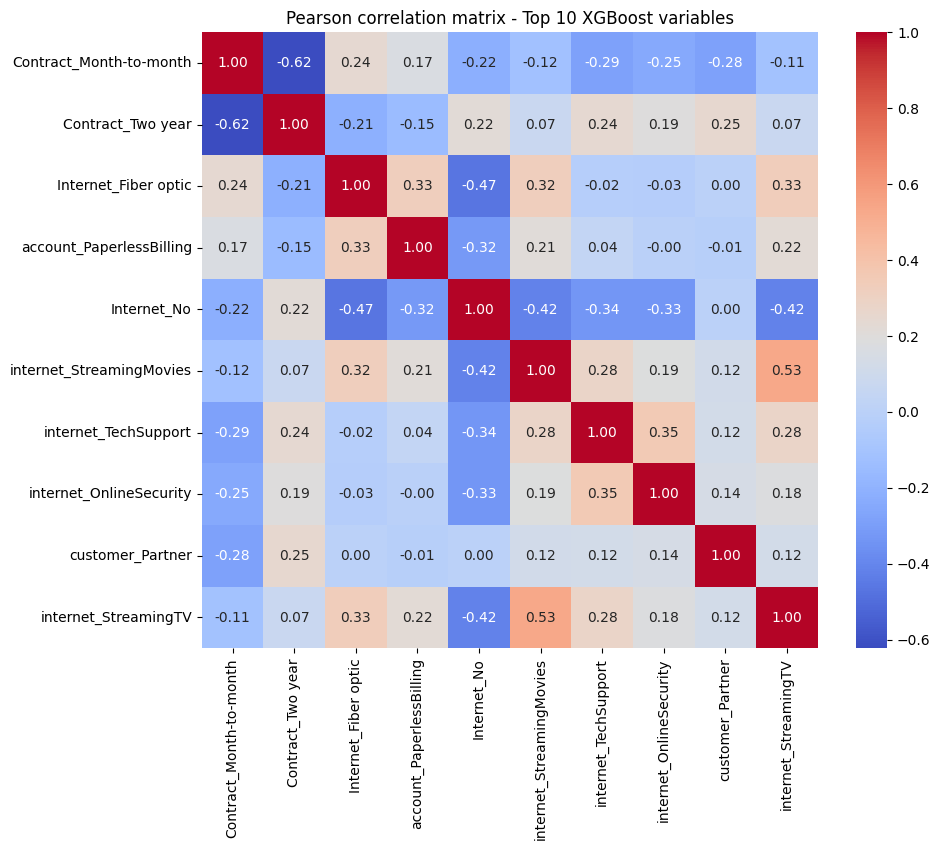

In [43]:
# Extract trained pipeline for XGBoost from results
xgb_pipeline = None
for res in results:
    if res['Model'] == 'XGBoost':
        xgb_pipeline = res['model']
        break

if xgb_pipeline is None:
    raise ValueError("No pipeline found for XGBoost in results")

# Extract the XGBoost model from the pipeline
xgb_model = xgb_pipeline.named_steps['model']

# Get importance of variables
importances = xgb_model.feature_importances_

# Create DataFrame of importance
feat_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Top 10 features
top_features = feat_importance_df.sort_values(by='importance', ascending=False).head(10)['feature'].values

# Correlation matrix with those variables
X_top = X[top_features]
corr_top = X_top.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_top, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Pearson correlation matrix - Top 10 XGBoost variables')
plt.show()


### **Análisis de umbral**

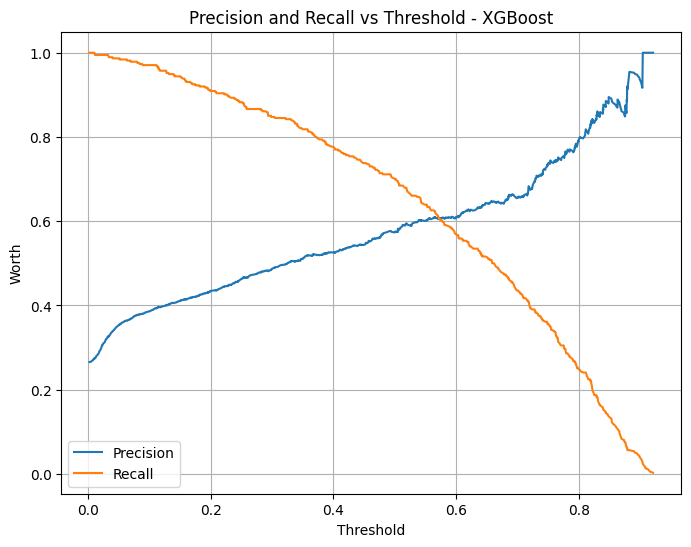

In [46]:
best_model_name = df_summary.sort_values(by='Average Precision', ascending=False).iloc[0]['Model']
best_model = next(res for res in results if res['Model'] == best_model_name)
precisions, recalls, thresholds = precision_recall_curve(y_test, best_model['y_prob'])

plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.title(f'Precision and Recall vs Threshold - {best_model_name}')
plt.xlabel('Threshold')
plt.ylabel('Worth')
plt.legend()
plt.grid(True)
plt.show()

**Observations**

* Contract type and duration, along with customer tenure (customer_tenure), are the most relevant factors, with a clear and strong pattern.

* Variables related to additional services (technical support, online security) tend to decrease churn, indicating that the model positively values these protections or benefits.

* Some services, such as fiber optics or electronic payments, may be associated with higher churn, possibly due to external factors (price, competition).

------

# 📋 **Interpretation and Conclusions**

## **1. Analytical Summary**

A robust pipeline was built to anticipate customer churn using machine learning techniques and explanatory analytics. The model that performed best was XGBoost, which stood out for its robustness and balance. It also demonstrates a good ability to correctly identify the positive class, while ensuring an appropriate balance in the overall classification.

This report presents a summary of the most relevant findings and proposes retention strategies based on the main factors driving customer churn.




## **2. Project Outline**

🔖 Exploratory analysis and data visualization

🔖 Data preparation

🔖 Correlation analysis

🔖 Normalization and balancing

🔖 Defining models and tuning parameters

🔖 Training with a multi-model pipeline (KNN, LG RF, RL, XGB, and Ensemble Model)

🔖 Hyperparameter optimization (GridSearchCV)

🔖 Model comparison (confusion matrices, metrics, and ROC curve)

🔖 Interpretation based on SHAP and Feature Importance

🔖 Final report



## **3. Model Comparison**

By metrics:

| Model                  | Accuracy | Precision | Recall | F1 Score | ROC AUC | Observations                                             |
| ---------------------- | -------- | --------- | ------ | -------- | ------- | -------------------------------------------------------- |
| **XGBoost**            | 0.783    | 0.575     | 0.701  | 0.631    | 0.845   | Good overall balance, excellent ROC AUC, and high recall |
| **LightGBM**           | 0.774    | 0.560     | 0.703  | 0.623    | 0.843   | Very similar to XGBoost, good recall and precision       |
| **LogisticRegression** | 0.744    | 0.511     | 0.786  | 0.620    | 0.843   | Better recall (sensitivity), lower precision             |
| **RandomForest**       | 0.776    | 0.560     | 0.722  | 0.631    | 0.841   | High recall, good overall balance                        |
| **Stacking Ensemble**  | 0.779    | 0.578     | 0.623  | 0.600    | 0.834   | Better precision, slightly lower recall and F1           |
| **KNN**                | 0.714    | 0.475     | 0.725  | 0.574    | 0.794   | Lower accuracy and precision, but acceptable recall      |


According to Confusion Matrix:

| Model | TN | FP | FN | TP | Observations |
| ----------------------- | --- | --- | --- | --- | ------------------------------------------------------------------------------ |
| **KNN** | 735 | 300 | 103 | 271 | Good Recall (high TP) <br> Many False Positives (high FP) |
| **LightGBM** | 828 | 207 | 111 | 263 | Good Balance <br> Somewhat more FN than KNN, but less FP |
| **XGBoost** | 841 | 194 | 112 | 262 | Better TN (low FP) <br> FN similar to LightGBM |
| **RandomForest** | 823 | 212 | 104 | 270 | Balanced <br> FN slightly better than XGBoost |
| **LogisticRegression** | 754 | 281 | 80 | 294 | Better FN (fewer false negatives) <br> More FP (risk of higher costs) |
| **Ensemble (Stacking)** | 865 | 170 | 141 | 233 | Better TN (less FP) <br> More FN (risk of losing churning customers) |

🎯 Selected model: **XGBoost** as it delivers a robust, well-balanced model with good predictive power, ideal for minimizing both customer loss (due to high recall) and avoiding false alarms (due to reasonable accuracy). It's a model that adapts well to most business cases where the trade-off between capturing churn and not overreacting must be managed.

## **4. Key Factors**

The objective of this analysis is to identify and explain the factors that most influence the probability of customer churn in a predictive model, using two complementary sources:

* SHAP summary plot: measures the individual contribution of each variable to the model's outcome.

* Correlation matrix: allows for detecting relationships between the most important variables, useful for understanding dependencies and potential interactions.

### **Factors that increase the likelihood of churn**

From the SHAP summary plot, we identify the characteristics that, when high (red), shift the points to the right (SHAP > 0), which means an increase in the likelihood of churn.

| Variable | SHAP Evidence | Possible explanation | |
| ------------------------------ | ---------------------------------- | --------------------------------------------- | -------------------------------------------------------------- |
| **Contract Month to Month** | High SHAP | Flexible contract, lower commitment |
| **Internet Fiber Optic** | Relevant SHAP | More demanding customers with more alternatives | <br> |
| **Payment Electronic Check** | Relevant SHAP | Volatile profile, lower contractual commitment | <br>
| **Paperless Billing** | Slight tendency toward high SHAP | Digital customer, attentive to offers | |


### **Factors that decrease the likelihood of churn**

Here, variables are considered where high values (red) are concentrated on the left (SHAP < 0), indicating a reduction in churn.

| Variable | SHAP Evidence | Possible explanation | |
| ---------------------------- | ------------------------------------------ | ------------------------------------------------------- | --------------------------------------------------------------- |
| **customer_tenure** | Very negative SHAP | Tenure = greater loyalty due to satisfaction or inertia | |
| **Two-year Contract** | High negative impact SHAP | Long contracts limit exits | |
| **internet_TechSupport** | Negative and relevant SHAP | Technical support adds value and reduces churn | |
| **internet_OnlineSecurity** | Negative and relevant SHAP | Additional protections generate trust | |
| **No Internet** | Slight negative SHAP trend | Without internet, less incentive to leave | |

### **Factors with mixed effects**

🔸internet_StreamingMovies and internet_StreamingTV: The SHAP shows dispersion to both the left and right for high and low values, indicating that the effect depends on other variables (strong interaction with contract type or additional services).

## **5. Patterns Identified**

* High-risk segment:

Monthly contracts, low tenure, use of fiber optics, payment by e-check, and electronic invoicing.

High correlation with each other → they likely represent a digital customer profile with a short contract, low tenure, and payment methods that may increase risk.

* Protected segment:

Two-year contracts, long tenure, with additional services (technical support, online security).

Online support and security services add protection.

* Key interactions:

The correlation suggests that the combination of a long contract + additional services maximizes retention.

The new customer + monthly contract + digital services is the highest risk.

## **6. Strategies to Reduce Churn**

🚨 For high-risk customers (monthly contracts, fiber optics, e-check payments):

* Incentivize switching to longer contracts with discounts or benefits.

* Improve the fiber service experience with prompt service and promotions.

* Promote automatic payment methods instead of e-checks.

* Personalize digital communications and offer clear benefits in e-billing.

🏆 For high-retention customers (long-term contracts, seniority, extra services):

* Maintain and enhance technical support, security, and additional services.

* Offer upgrades and bundled packages to increase value.

* Proactive communication and loyalty programs.

💡 For services with a mixed effect (streaming):

* Personalize offers based on profile and combine with other services to improve retention.

🌐 General strategies:

* Improve onboarding to increase initial engagement.

* Use predictive models to detect and respond to signs of abandonment.

* Optimize the digital experience with self-service and accessible support.

## **7. Conclusions**

🔹A robust and advanced pipeline was developed that includes preprocessing, selection of relevant variables, and class balancing, which significantly improved predictive capacity compared to the baseline.

🔹The combination of interpretable techniques (coefficients, SHAP) with nonlinear models made it possible to clearly identify the factors that truly influence churn, ensuring explainability and accuracy.

🔹The key factors that influence the probability of churn are:

* Contract type (monthly contracts increase churn, long-term contracts reduce it).

* Payment method (electronic checks are associated with higher risk).

* Customer tenure (customers with longer tenure have lower churn).

* Additional services (technical support, online security, etc., improve retention).

The strategies derived from the analysis are clear, actionable, and can be directly implemented by marketing and retention teams, maximizing effectiveness in reducing churn.

In short, the combined approach and depth of analysis provide a solid foundation for designing customized interventions that increase loyalty and reduce customer churn.